##**Introduction**
Customer churn occurs when a customer stops using a company's products or services.

Customer churn affects profitability, especially in industries where revenues are heavily dependent on subscriptions or other services. It is estimated that acquiring a new customer can cost up to five times more than retaining an existing one.

Therefore, customer churn analysis is essential as it can help a business by identify problems in its services (e.g. poor quality product/service, poor customer support, wrong target audience, etc.), and
make correct strategic decisions that would lead to higher customer satisfaction and consequently higher customer retention.

###**Objective**
The goal of this notebook is to understand and predict customer churn on the given dataset. Specifically, I will initially perform Exploratory Data Analysis (EDA) to identify and visualise the factors that contribute to customer churn. This analysis will later help me to build Machine Learning models to predict whether a customer will churn or not.

This is a typical classification problem. The task does not specify which performance metric to use for optimising our machine learning models. I decided to use recall besides calculating other metrics since correctly classifying elements of the positive class (customers who churned) is more important.



Skills: Exploratory Data Analysis, Data Visualisation, Data Preprocessing (Feature Selection, Encoding Categorical Features, Feature Scaling), Addressing Class Imbalance (SMOTE), Model Tuning.

Models Used: Logistic Regression, KNN, Gaussian NaiveBayes,Decision Trees, Random Forests, Gradient Boosting, XGBoost, AdaBoost and Multi-Layer Perceptron Classsifier

###**Libraries**

I start by importing the necessary libraries and setting some parameters for the whole notebook. I will mainly use:

Pandas for handling and analysing data,
Seaborn and Matplotlib for data visualization, and
Scikit-learn for building Machine Learning models.

###**Details about the dataset**
The dataset consists of 111300 observations and 31 variables. Independent variables contain information about customers. Dependent variable refers to customer status i.e. whether churned or retained

###**Result**

1. As the problem here is to predict the customers who will leave(churn) the Business, I will give first importance to perfrmance metric such as 'Recall' on Target label 1 (Churned) followed by accuracy. If we are good at predicting which memebers leave then the metric 'Recall' is very important.


2. The given dataset is slightly imbalanced.I have developed various classification models after removing correlated and two more features from dataset , among those XGB classifier with hyperparamter tuning has given good results with accuracy 82.01 and Recall 0.76 on class labe =1 (customers who churned) wit slightly imbalanced dataset

     After balancing the dataset the same model XGB classifier gave accuracy=  84.8 and Recall = 0.84 on class label =1 (customers who churned)

3. I did feature importance using different feature selection methods and developed models with most important features. Among developed models with most important features of dataset, Gradient Boosting Classifier with hyper paramter tuning produced good results with accuracy 81.6 and Recall 0.75 on slightly imbalanced dataset.
   
   After balancing the dataset the same model Gradient Boosting classifier gave accuracy= 84.4 and Recall = 0.85 on class labe =1 (customers who churned).

4. Overall The Naive Bayes classifier has very good 'Recall' = 0.93(Label =1) on balanced dataset of important features on target 


##**Exploratory Data Analysis through Data Visualization**

In [ ]:
#Installing Required Libraries
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Installing Required Libraries
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
from collections import Counter
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Reading the data
data=pd.read_csv('/content/drive/MyDrive/MLClassification.csv')

In [ ]:
#Looking into data
data.head()

,userId,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,target
0,1,12,2018-01-12,536.950001,400.349998,20.0,NaN,476.970004,59.979997,19,11,1703,1,0,16,16,7,2,NaN,0.619001,5,42.780001,M,58,NaN,0.00,5147.0,3.0,15443.0,3572.0,1
1,2,1,2017-10-28,90.000000,25.000000,10.0,NaN,40.000000,50.000000,4,1,5,1,0,1,3,2,2,NaN,0.444395,4,50.000000,F,29,NaN,0.00,581.0,1.0,581.0,581.0,1
2,3,14,2017-12-30,1422.899999,1386.279999,15.0,500.0,1855.659953,-432.759955,68,18,1315,1,1,24,27,4,3,19.0,1.176471,5,-0.100000,F,36,NaN,0.16,509.0,22.0,11212.0,107.0,1
3,4,14,2018-02-16,1494.000041,903.300028,90.0,NaN,1344.060010,149.940031,12,4,3794,7,0,8,7,27,2,NaN,0.899633,12,149.940031,M,20,NaN,0.06,2382.0,6.0,14293.0,14293.0,1
4,5,1,2018-01-18,110.700000,74.540001,10.0,NaN,75.740002,34.959998,8,3,61,1,0,4,6,2,2,NaN,0.684130,8,34.959998,M,42,1.0,0.00,2028.0,2.0,4057.0,2856.0,1


In [ ]:
#Checking for dimensions of data
data.shape

(111300, 31)

In [ ]:
#Checking for no. of unique Values
#I could see the userId is unique for every member
data.nunique()

userId    111300
X1             8
X2            90
X3         97114
X4         92244
X5          3437
X6          7531
X7        101330
X8         97244
X9           522
X10          127
X11        10061
X12          204
X13           55
X14          304
X15          332
X16           30
X17           15
X18           31
X19        86348
X20          108
X21        58287
X22            2
X23           80
X24         1565
X25         5154
X26         8464
X27          232
X28        39987
X29        13440
target         2
dtype: int64

In [ ]:
#Checking for the count and data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111300 entries, 0 to 111299
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   userId  111300 non-null  int64  
 1   X1      111300 non-null  int64  
 2   X2      111300 non-null  object 
 3   X3      111300 non-null  float64
 4   X4      111300 non-null  float64
 5   X5      111300 non-null  float64
 6   X6      111032 non-null  float64
 7   X7      111300 non-null  float64
 8   X8      111300 non-null  float64
 9   X9      111300 non-null  int64  
 10  X10     111300 non-null  int64  
 11  X11     111300 non-null  int64  
 12  X12     111300 non-null  int64  
 13  X13     111300 non-null  int64  
 14  X14     111300 non-null  int64  
 15  X15     111300 non-null  int64  
 16  X16     111300 non-null  int64  
 17  X17     111300 non-null  int64  
 18  X18     111036 non-null  float64
 19  X19     111300 non-null  float64
 20  X20     111300 non-null  int64  
 21  X21     11

In [ ]:
#checking for count,mean,standard deviation, min and max value of respective columns
data.describe()

,userId,X1,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X23,X24,X25,X26,X27,X28,X29,target
count,111300.000000,111300.000000,1.113000e+05,1.113000e+05,111300.000000,111032.000000,1.113000e+05,111300.000000,111300.000000,111300.000000,111300.000000,111300.000000,111300.000000,111300.000000,111300.000000,111300.000000,111300.000000,111036.000000,111300.000000,111300.000000,111300.000000,111300.000000,111041.000000,111300.000000,111283.000000,111283.000000,1.112830e+05,111283.000000,111300.000000
mean,55650.500000,8.341671,1.991669e+03,1.850378e+03,153.166110,126.290325,1.911740e+03,70.815990,39.561545,8.631105,1390.996631,5.082525,0.646388,17.034762,20.951527,7.403270,2.680539,4.651518,0.678743,7.040117,29.089919,35.753756,29.036392,10.862206,1841.259941,12.602734,1.835867e+04,2586.036969,0.359389
std,32129.686818,6.282890,1.388146e+04,1.381142e+04,916.121993,1147.441259,1.368287e+04,1151.292654,49.005105,8.796162,3333.528453,11.487171,1.995277,22.841735,25.750787,8.178437,1.096070,6.787548,1.432206,7.087706,642.884958,12.277954,179.571948,530.834554,1846.980181,17.701710,3.335355e+04,3917.778743,0.479824
min,1.000000,1.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,-159346.313169,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-159087.763159,18.000000,0.000000,0.000000,29.000000,1.000000,3.500000e+01,0.000000,0.000000
25%,27825.750000,1.000000,1.082000e+02,5.098000e+01,10.000000,0.000000,6.500000e+01,27.927479,10.000000,3.000000,101.000000,1.000000,0.000000,5.000000,6.000000,1.000000,2.000000,0.000000,0.304262,3.000000,0.900000,27.000000,0.000000,0.000000,760.000000,2.000000,3.179000e+03,372.000000,0.000000
50%,55650.500000,5.000000,3.208000e+02,2.085000e+02,20.000000,0.000000,2.616200e+02,49.949999,23.000000,6.000000,360.000000,2.000000,0.000000,10.000000,13.000000,4.000000,2.000000,1.000000,0.670738,5.000000,10.000000,33.000000,0.000000,0.040000,1330.000000,6.000000,7.806000e+03,1259.000000,0.000000
75%,83475.250000,14.000000,1.082962e+03,9.070125e+02,80.000000,20.000000,1.011970e+03,89.799996,51.000000,11.000000,1252.000000,4.000000,1.000000,21.000000,26.000000,13.000000,3.000000,7.000000,0.904762,8.000000,34.999992,43.000000,0.000000,0.180000,2263.500000,16.000000,1.957650e+04,3099.000000,1.000000
max,111300.000000,21.000000,1.570011e+06,1.569616e+06,89340.000000,127000.000000,1.555414e+06,51061.011525,1162.000000,151.000000,107707.000000,497.000000,230.000000,562.000000,599.000000,29.000000,15.000000,30.000000,197.666664,232.000000,28500.000000,117.000000,5490.000000,159086.320000,49847.000000,427.000000,1.059543e+06,66277.000000,1.000000


Checking for count of target labels . I could see the target labels are slightly imabalanced.

0    71300
1    40000
Name: target, dtype: int64


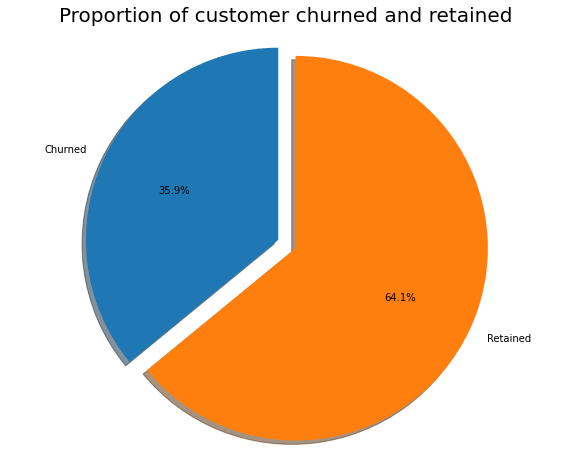

In [ ]:
churn_count = data['target'].value_counts()
print(churn_count)
labels = 'Churned', 'Retained'
sizes = [data.target[data['target']==1].count(), data.target[data['target']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of customer churned and retained", size = 20)
plt.show()


I could see the column 'X22' is gender column and Checking for the count of gender in the data. The count of females is more than the male count

F    62115
M    49185
Name: X22, dtype: int64


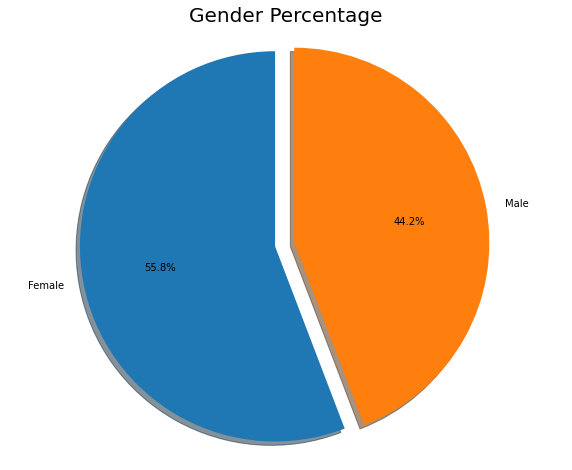

In [ ]:
gender_count = data['X22'].value_counts()
print(gender_count)
labels = 'Female', 'Male'
sizes = [data.X22[data['X22']=='F'].count(), data.X22[data['X22']=='M'].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10,8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Gender Percentage", size = 20)
plt.show()

Checking for churned and retained customers in male and female.I could see the ratio of churned customers is more among males.

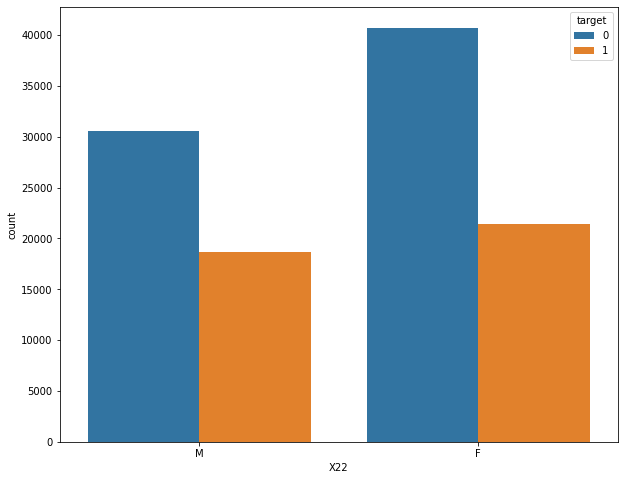

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(x='X22', hue = 'target',data = data)


By Looking into the data, I came to conclusion that the column 'X23' is related to Age of the customers and it is a continuos column. I would like to see ,which age group of memebers are retaining and exiting. I could see the churing rate is more below 25. Also I could see there are most of the memebers in the dataset areof age group less than 55. I can see the count of the churned and retained customers of any age group is following gaussian-distribution.

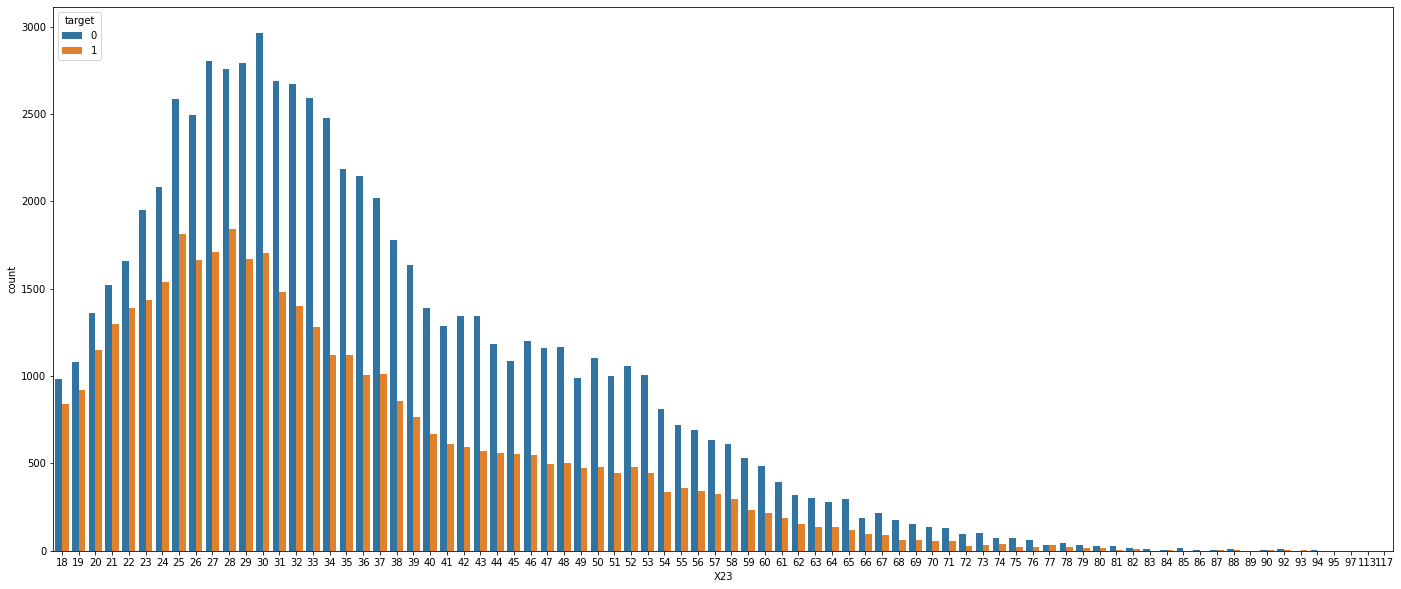

In [ ]:
plt.figure(figsize=(24,10))

sns.countplot(x='X23',hue='target',  data=data)


Lets count of members belongs to different age and their respective gender. There are more males than females at the age below or equal to 20. After age=20, there are more females than males.

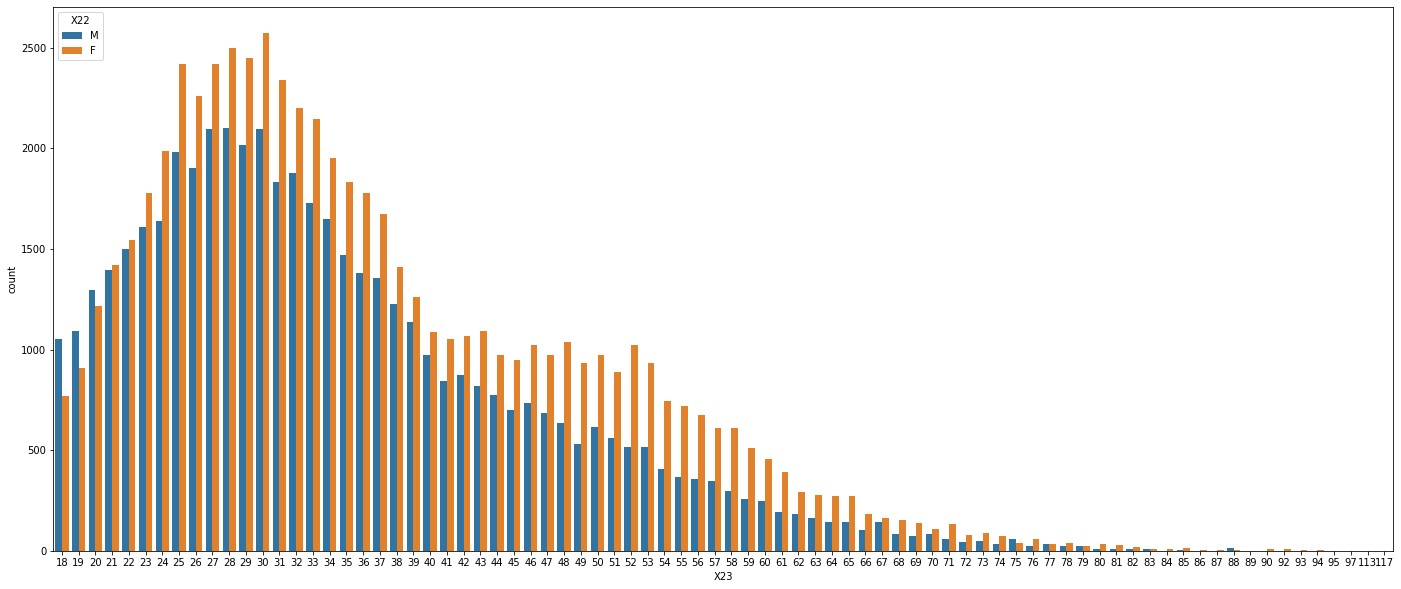

In [ ]:
plt.figure(figsize=(24,10))

sns.countplot(x='X23',hue='X22',  data=data)


Now, I will do scatter plot for other columns which are huge in count and see if there are any outliers. It can be seen from the visualization that there are some outliers. I deal with the outliers in later part of this notebook.

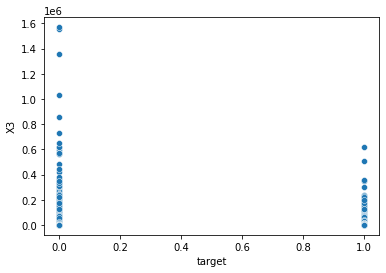

In [ ]:
sns.scatterplot(x='target',y='X3',data=data)

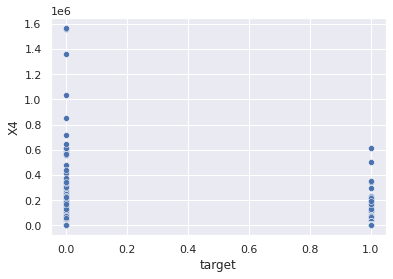

In [ ]:
sns.scatterplot(x='target',y='X4',data=data)


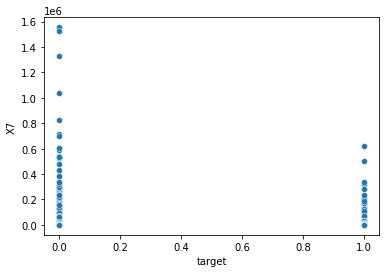

In [ ]:
sns.scatterplot(x='target',y='X7',data=data)

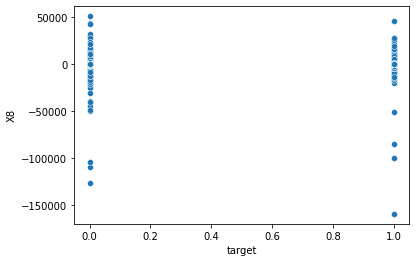

In [ ]:
sns.scatterplot(x='target',y='X8',data=data)

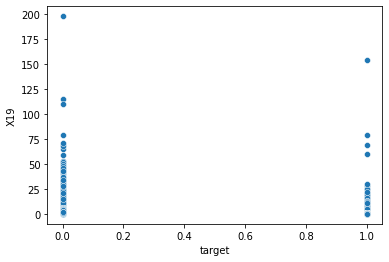

In [ ]:
sns.scatterplot(x='target',y='X19',data=data)

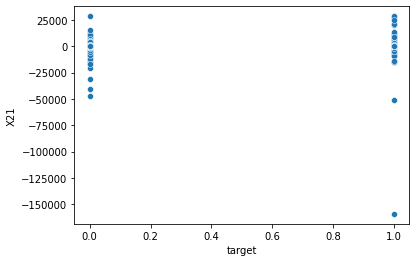

In [ ]:
sns.scatterplot(x='target',y='X21',data=data)

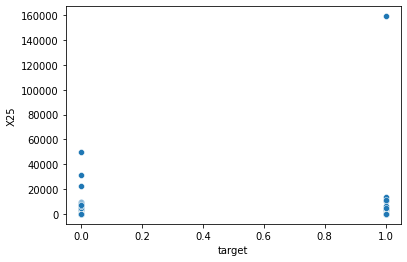

In [ ]:
sns.scatterplot(x='target',y='X25',data=data)

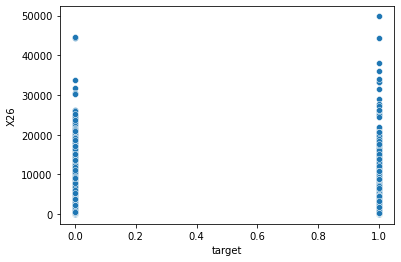

In [ ]:
sns.scatterplot(x='target',y='X26',data=data)

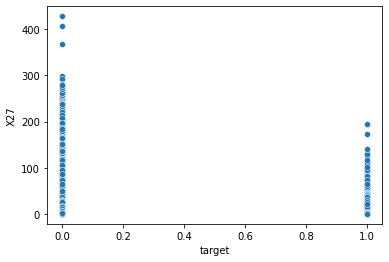

In [ ]:
sns.scatterplot(x='target',y='X27',data=data)

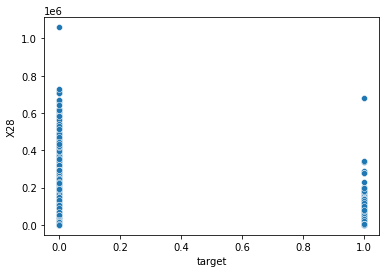

In [ ]:
sns.scatterplot(x='target',y='X28',data=data)

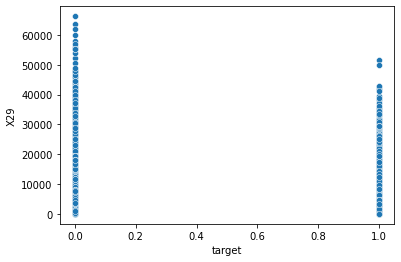

In [ ]:
sns.scatterplot(x='target',y='X29',data=data)

Now, I will do some visualizations between target labels and the date given. It can be seen that 90 unique values are there in the date column. I will split 'X2' into year , month and date columns and see the customers behaviour on various dates and months.


In [ ]:
data['X2'].nunique()

90

In [ ]:
data[["year","month" ,"date"]] = data["X2"].str.split("-", expand = True)

In [ ]:
data.head()

,userId,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,target,year,month,date
0,1,12,2018-01-12,536.950001,400.349998,20.0,NaN,476.970004,59.979997,19,11,1703,1,0,16,16,7,2,NaN,0.619001,5,42.780001,M,58,NaN,0.00,5147.0,3.0,15443.0,3572.0,1,2018,01,12
1,2,1,2017-10-28,90.000000,25.000000,10.0,NaN,40.000000,50.000000,4,1,5,1,0,1,3,2,2,NaN,0.444395,4,50.000000,F,29,NaN,0.00,581.0,1.0,581.0,581.0,1,2017,10,28
2,3,14,2017-12-30,1422.899999,1386.279999,15.0,500.0,1855.659953,-432.759955,68,18,1315,1,1,24,27,4,3,19.0,1.176471,5,-0.100000,F,36,NaN,0.16,509.0,22.0,11212.0,107.0,1,2017,12,30
3,4,14,2018-02-16,1494.000041,903.300028,90.0,NaN,1344.060010,149.940031,12,4,3794,7,0,8,7,27,2,NaN,0.899633,12,149.940031,M,20,NaN,0.06,2382.0,6.0,14293.0,14293.0,1,2018,02,16
4,5,1,2018-01-18,110.700000,74.540001,10.0,NaN,75.740002,34.959998,8,3,61,1,0,4,6,2,2,NaN,0.684130,8,34.959998,M,42,1.0,0.00,2028.0,2.0,4057.0,2856.0,1,2018,01,18


In [ ]:
data["year_month"] = data['year'].map(str)+'-'+data['month'].map(str)

In [ ]:
data.head()

,userId,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,target,year,month,date,year_month
0,1,12,2018-01-12,536.950001,400.349998,20.0,NaN,476.970004,59.979997,19,11,1703,1,0,16,16,7,2,NaN,0.619001,5,42.780001,M,58,NaN,0.00,5147.0,3.0,15443.0,3572.0,1,2018,01,12,2018-01
1,2,1,2017-10-28,90.000000,25.000000,10.0,NaN,40.000000,50.000000,4,1,5,1,0,1,3,2,2,NaN,0.444395,4,50.000000,F,29,NaN,0.00,581.0,1.0,581.0,581.0,1,2017,10,28,2017-10
2,3,14,2017-12-30,1422.899999,1386.279999,15.0,500.0,1855.659953,-432.759955,68,18,1315,1,1,24,27,4,3,19.0,1.176471,5,-0.100000,F,36,NaN,0.16,509.0,22.0,11212.0,107.0,1,2017,12,30,2017-12
3,4,14,2018-02-16,1494.000041,903.300028,90.0,NaN,1344.060010,149.940031,12,4,3794,7,0,8,7,27,2,NaN,0.899633,12,149.940031,M,20,NaN,0.06,2382.0,6.0,14293.0,14293.0,1,2018,02,16,2018-02
4,5,1,2018-01-18,110.700000,74.540001,10.0,NaN,75.740002,34.959998,8,3,61,1,0,4,6,2,2,NaN,0.684130,8,34.959998,M,42,1.0,0.00,2028.0,2.0,4057.0,2856.0,1,2018,01,18,2018-01


It can bee seen only 5 months of data is given. In the year 2017 , oct and dec months data is given and in the year 2018 jan , feb , march data is given.

Also, the the data is not given for all days in the month. I could see , only in oct 2017 almost all days data given expect for one day(as oct has 31 days in the month)

year_month
2017-10    30
2017-12    10
2018-01    20
2018-02    15
2018-03    15
Name: date, dtype: int64


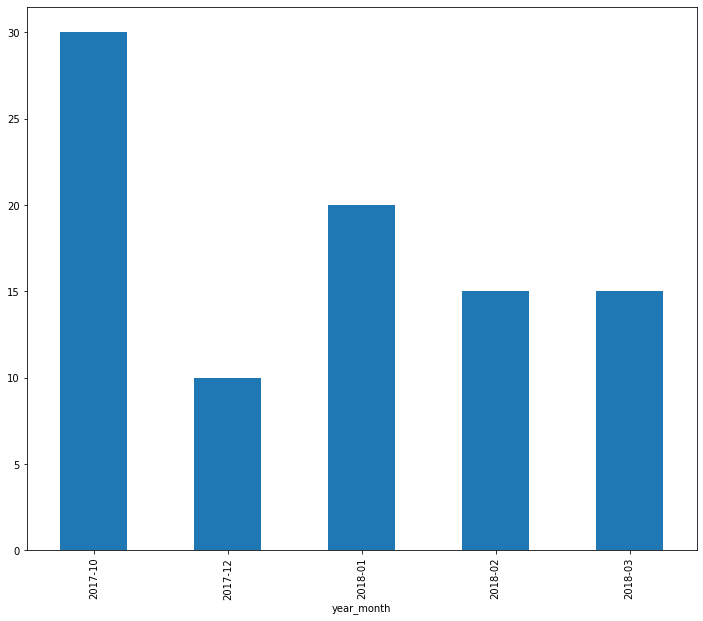

In [ ]:
numofdays=data.groupby('year_month')['date'].nunique()
print(numofdays)
plt.figure(figsize=(12,10))

numofdays.plot(kind='bar')

Lets see which dates are present in the given months using some data visualizations

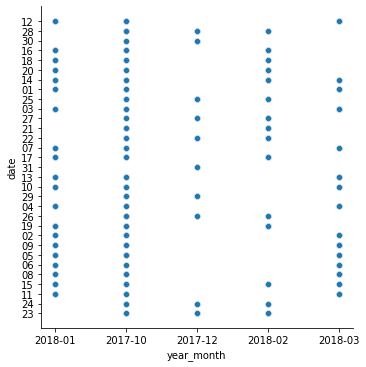

In [ ]:
sns.relplot(x='year_month',y='date', data=data)

In [ ]:
data['date'].unique()

array(['12', '28', '30', '16', '18', '20', '14', '01', '25', '03', '27',
       '21', '22', '07', '17', '31', '13', '10', '29', '04', '26', '19',
       '02', '09', '05', '06', '08', '15', '11', '24', '23'], dtype=object)


*   Oct 2017 - Data is given from Oct 1  to Oct 30

*   Nov 2017 - No data


*   Dec 2017 - Data is given from Dec 22 to Dec 31

*   Jan 2018 - Data is given from Jan 1 to Jan 20



*   Feb 2018 - Data is given from Feb 14 to Feb 28



*   Mar 2018 - Data is given from Mar 2 to Mar 15




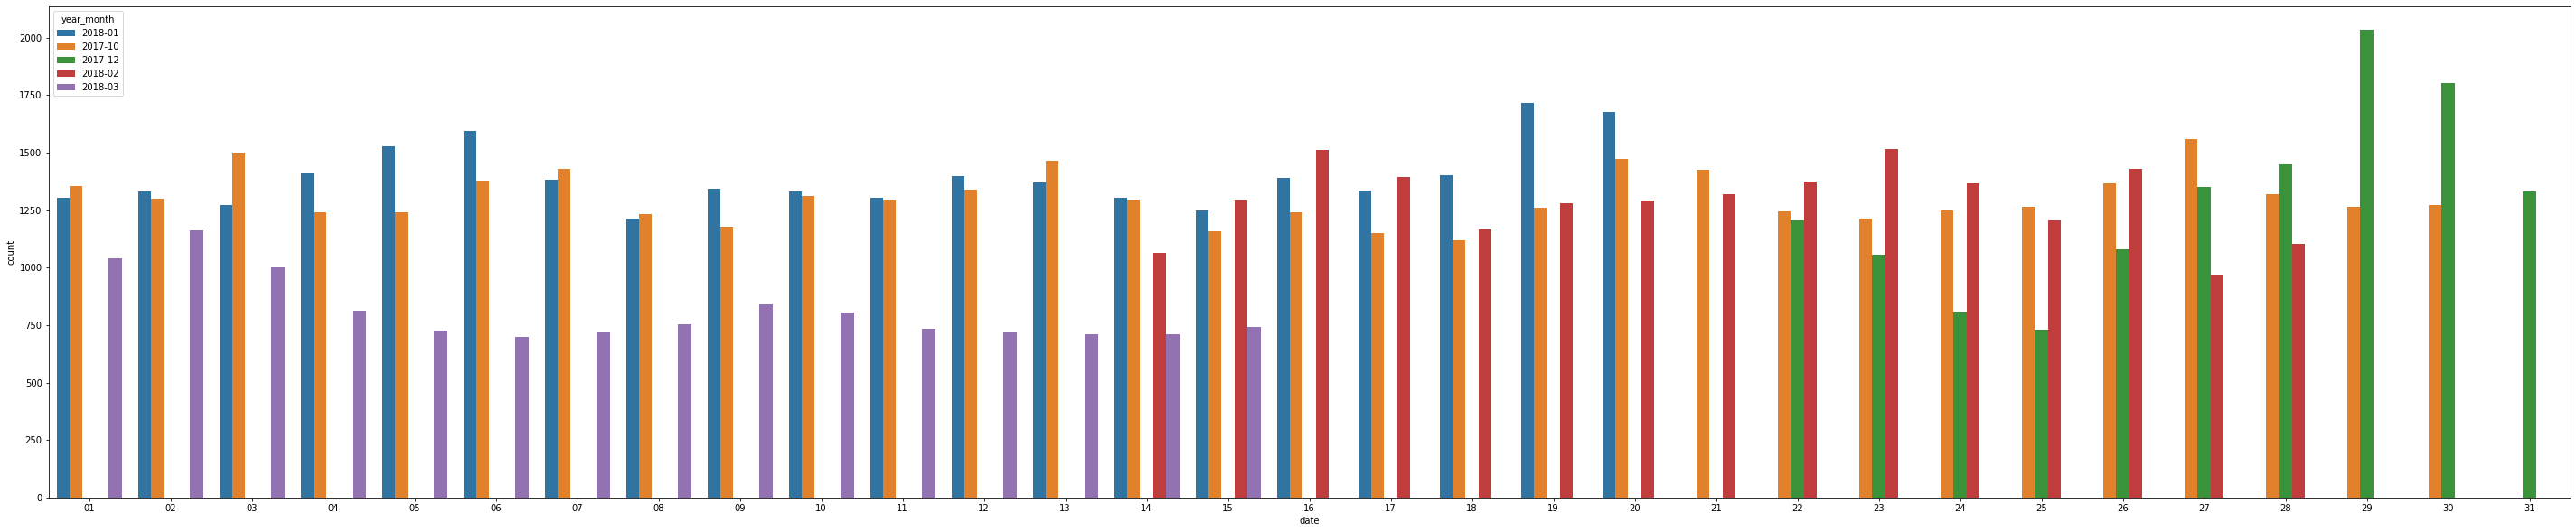

In [ ]:

dates=['01','02','03','04','05','06','07','08','09','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28','29','30','31']
plt.figure(figsize=(50,10))

sns.countplot(x='date',hue='year_month', order=dates, data=data)


Lets see the members churning and retaining different dates. This observation is also important because during month start ,month end and month-middle we can see the customers churing and retaining rate. 

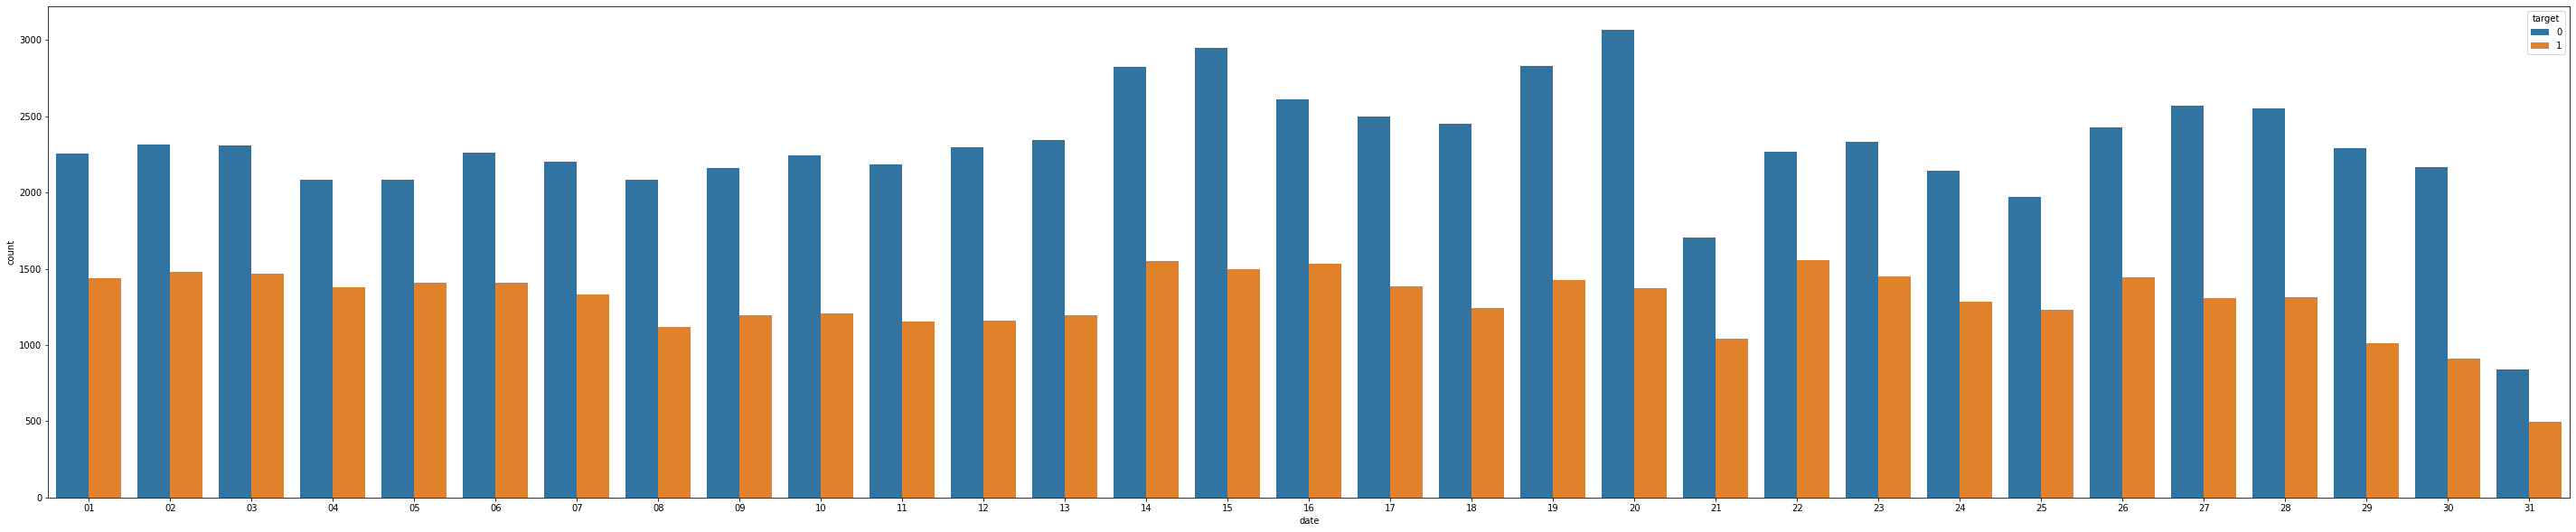

In [ ]:
dates=['01','02','03','04','05','06','07','08','09','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28','29','30','31']
plt.figure(figsize=(50,10))

sns.countplot(x='date',hue='target',order=dates, data=data)


Let's see how many members are there in given months. We should not conclude that there are more members in october. Since there are less number of days in the given data for the other months, it can be seen the members in the other months is considerably less compared to october.

year_month
2017-10    39134
2017-12    12846
2018-01    27858
2018-02    19286
2018-03    12176
Name: userId, dtype: int64


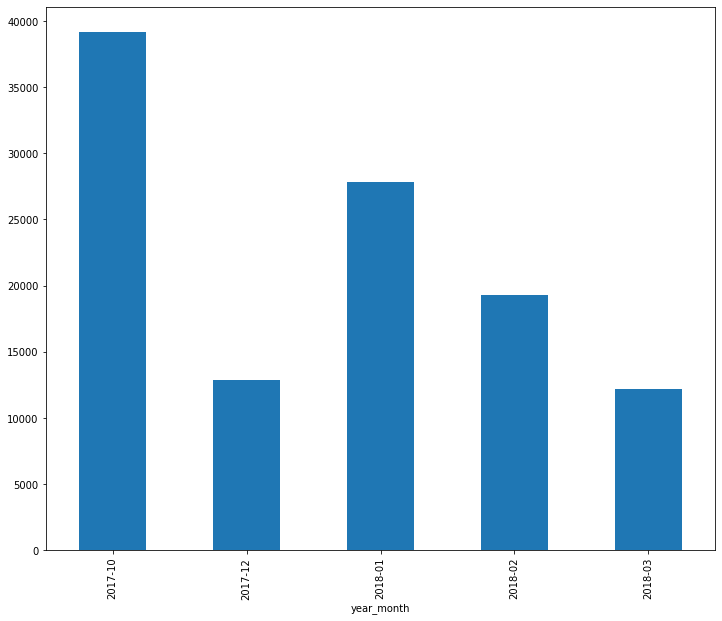

In [ ]:
userids=data.groupby('year_month')['userId'].nunique()
print(userids)
plt.figure(figsize=(12,10))

userids.plot(kind='bar')

I could see the churn rate is more in dec month followed by feb month based on given data

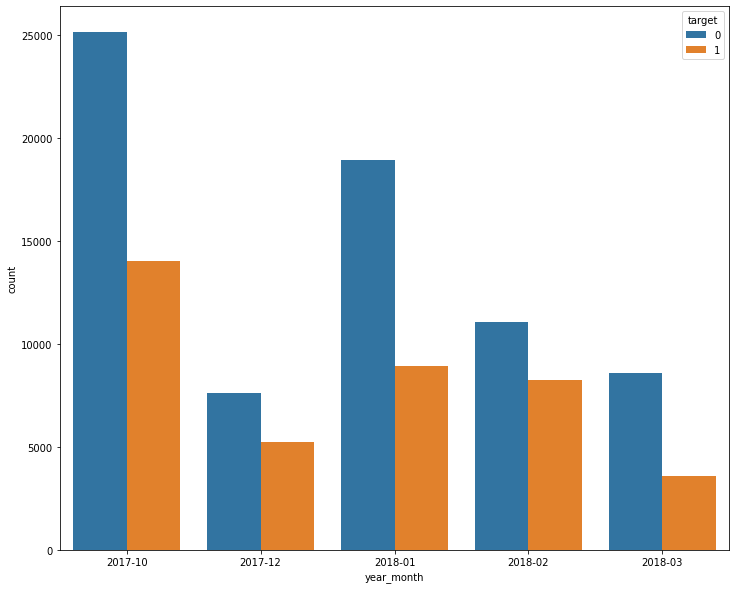

In [ ]:
Months = ['2017-10', '2017-12', '2018-01', '2018-02', '2018-03']
plt.figure(figsize=(12,10))

sns.countplot(x='year_month',hue='target',order=Months, data=data)


As I was not given any information regarding column names, I will do some data visualtions of other columns and lets see if I can find any pattern.

When colum 'X1'=4 , the churn rate is more than the retained rate

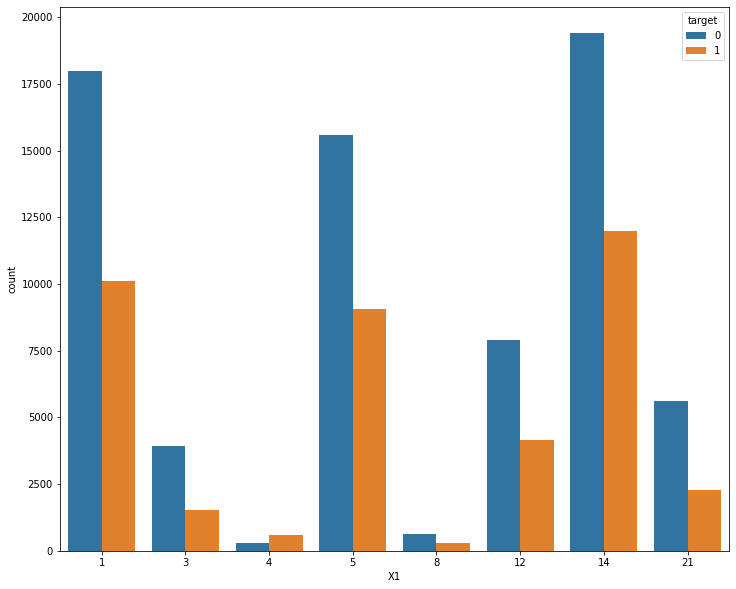

In [ ]:
plt.figure(figsize=(12,10))

sns.countplot(x='X1',hue='target',data=data)

When 'X12'= 0,1 the churning rate more compared to retained rate

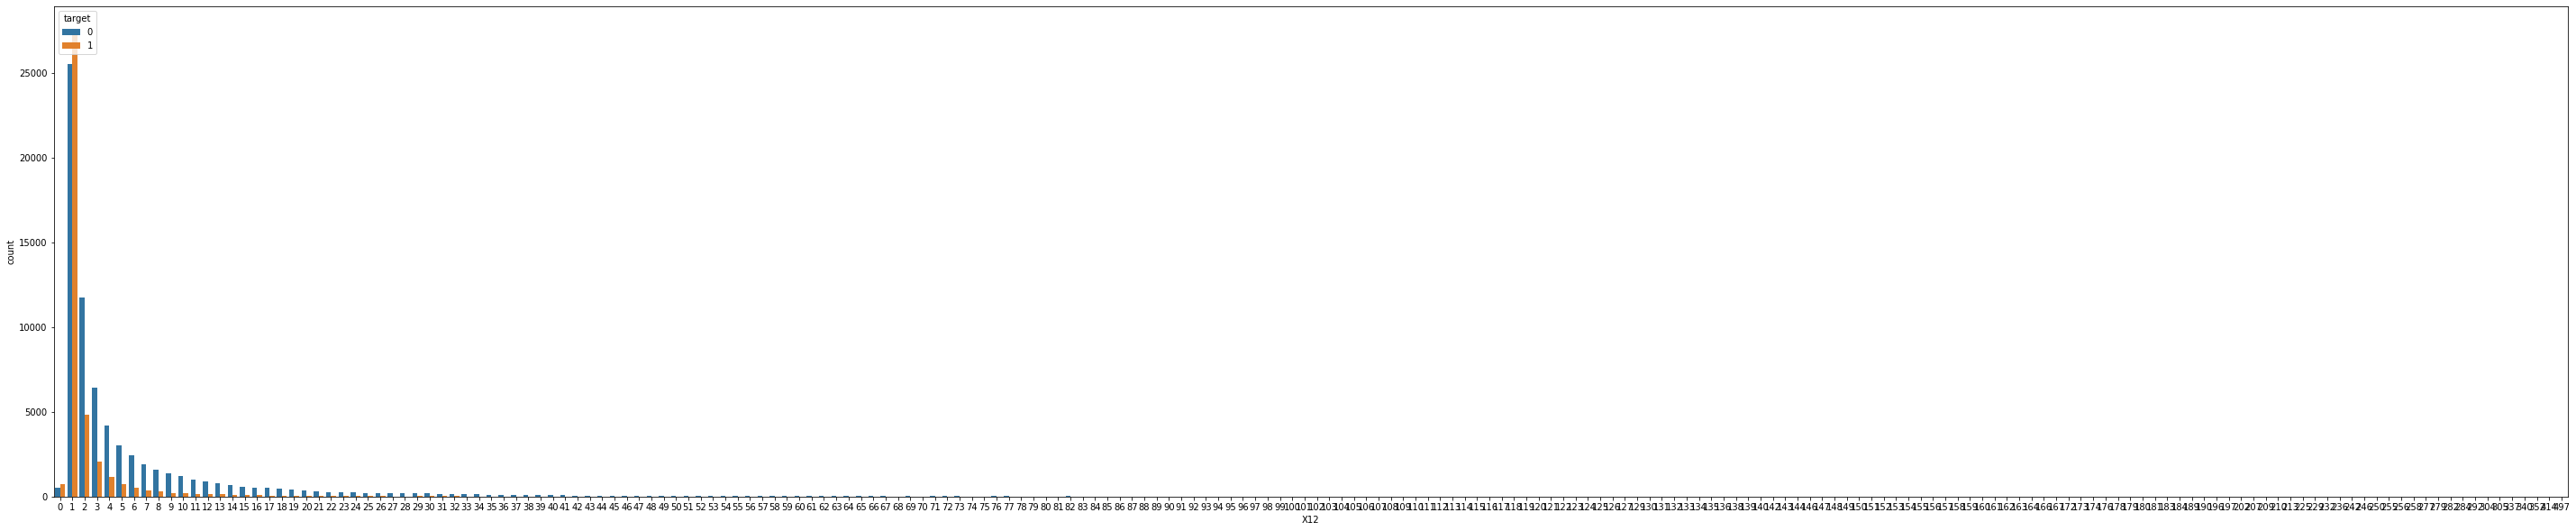

In [ ]:
plt.figure(figsize=(50,10))

sns.countplot(x='X12',hue='target', data=data)


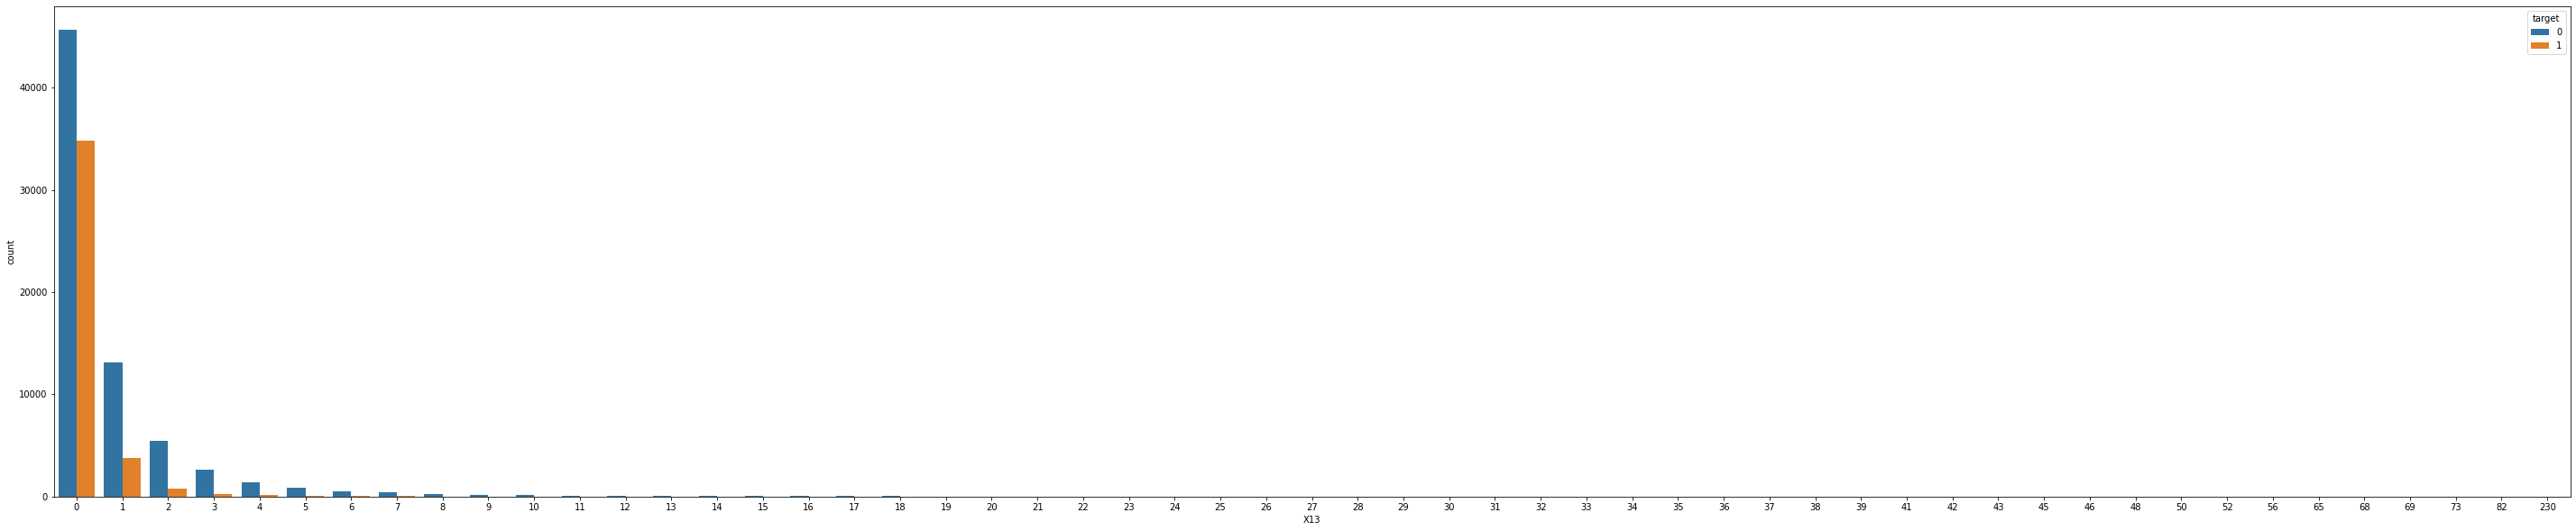

In [ ]:


plt.figure(figsize=(50,10))

sns.countplot(x='X13',hue='target', data=data)


When colum 'X14' less than 7 , the churning rate is more.

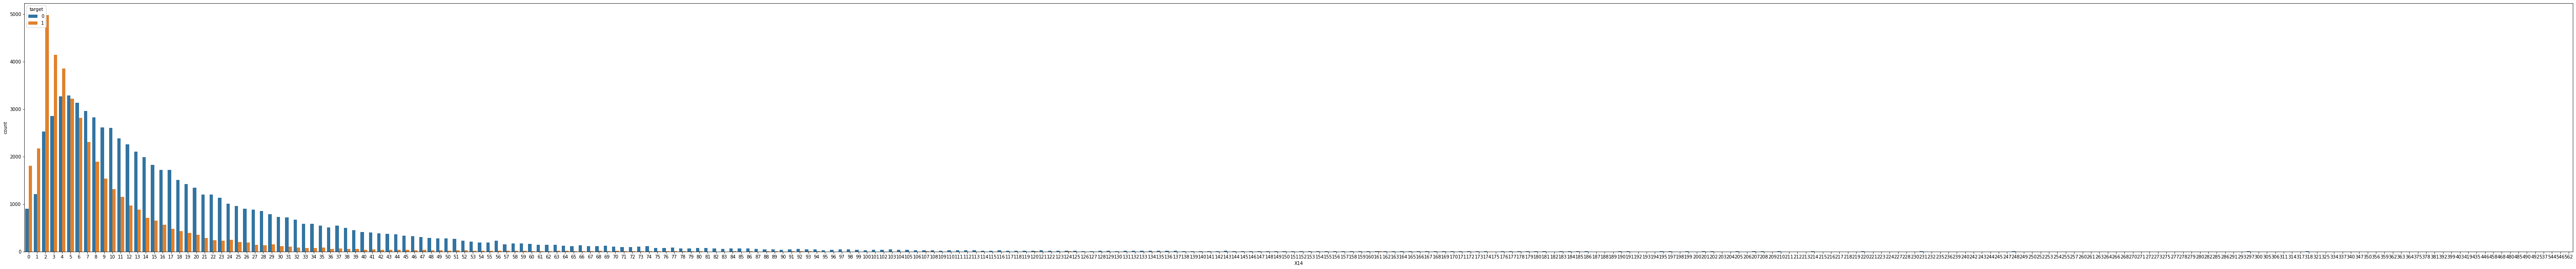

In [ ]:
plt.figure(figsize=(100,10))

sns.countplot(x='X14',hue='target', data=data)


When column 'X15' is less than 10 , the churning is more.

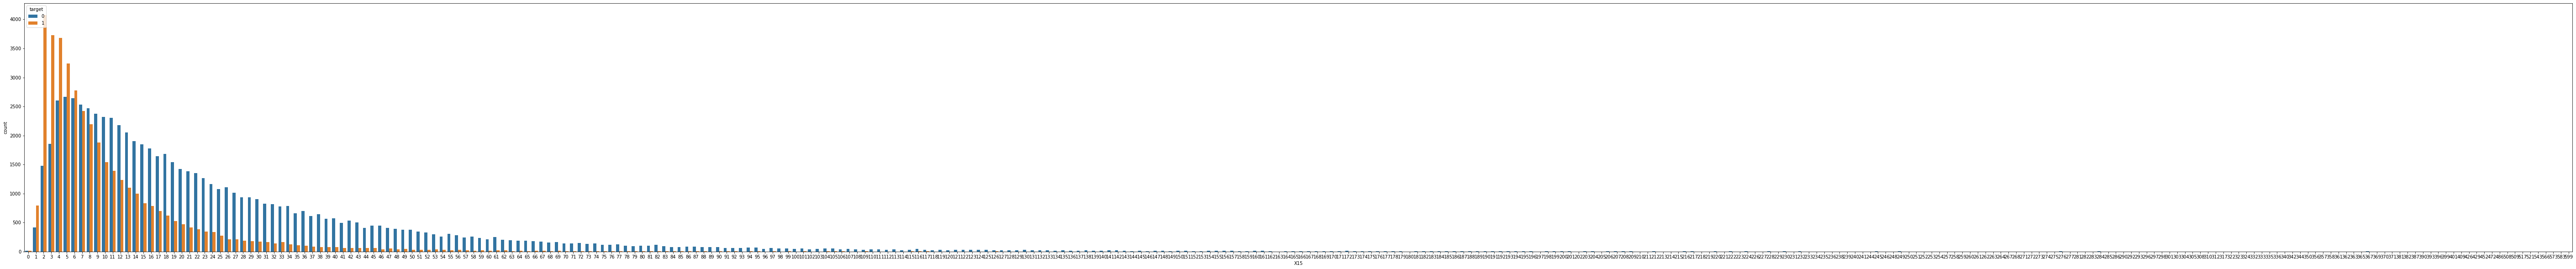

In [ ]:
plt.figure(figsize=(100,10))

sns.countplot(x='X15',hue='target', data=data)


When column 'X16' is greater than 10 , the churning is more.

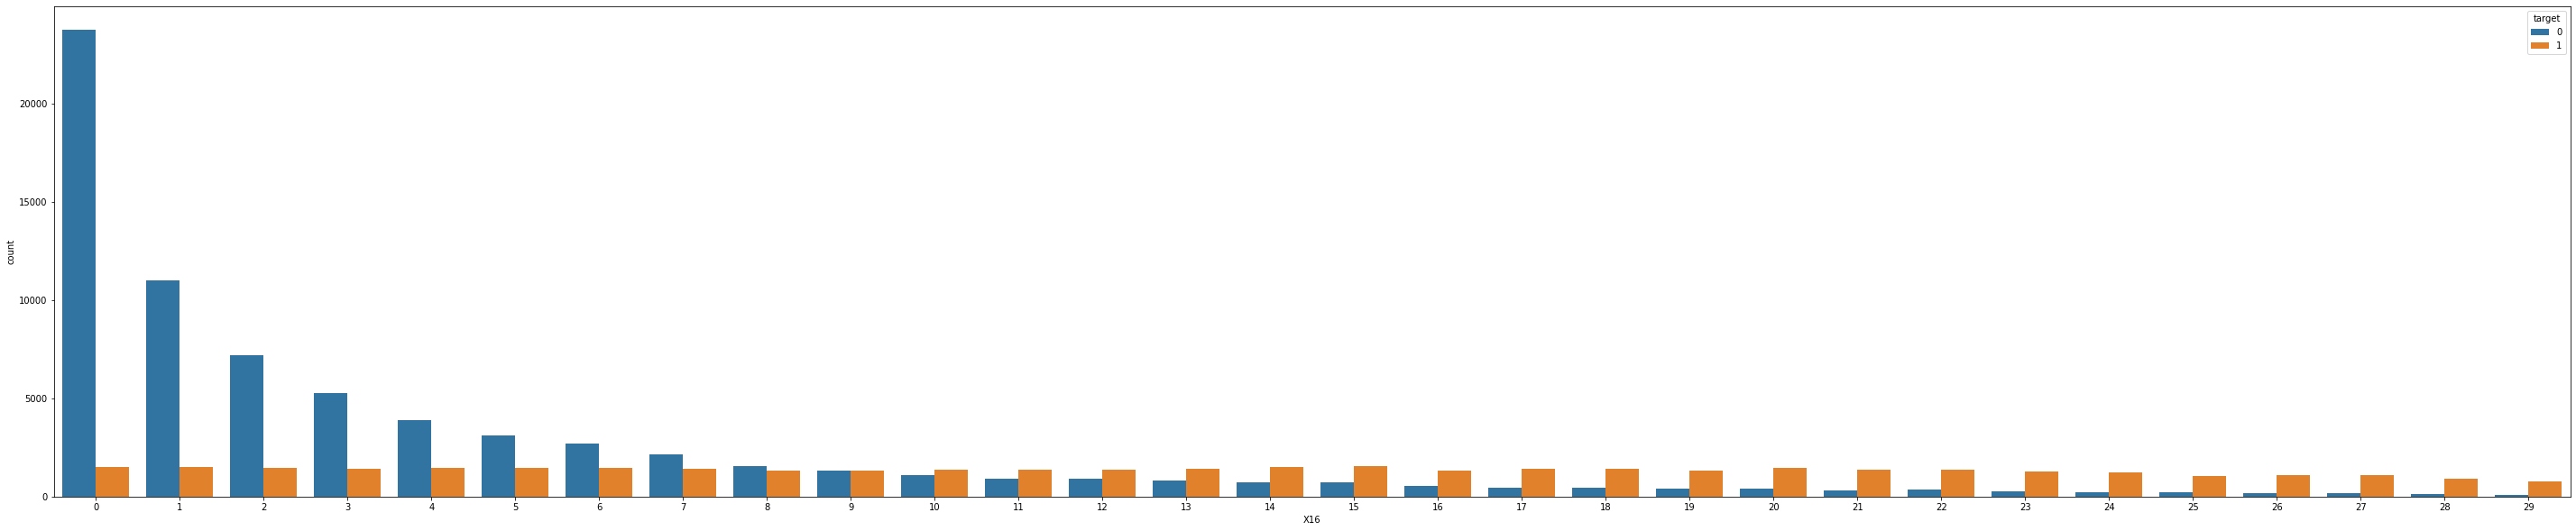

In [ ]:
plt.figure(figsize=(50,10))

sns.countplot(x='X16',hue='target', data=data)


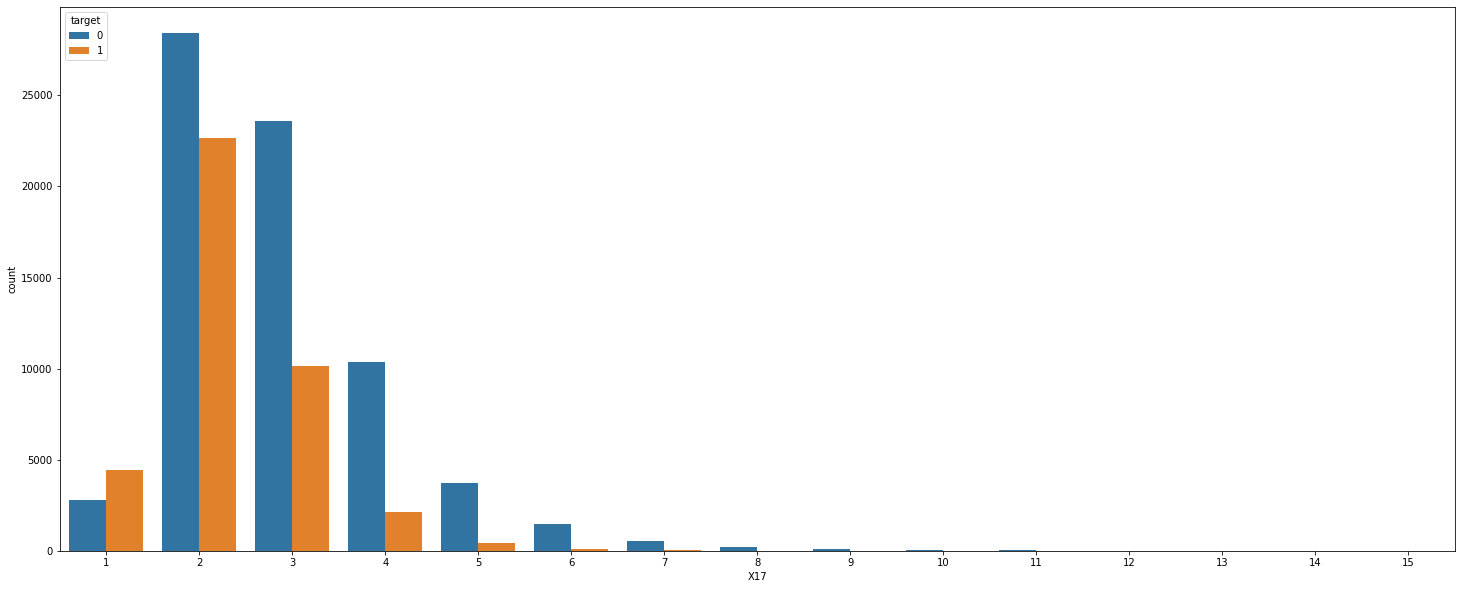

In [ ]:

plt.figure(figsize=(25,10))

sns.countplot(x='X17',hue='target', data=data)


When column 'X18' is equal to 0 , Churning is more.

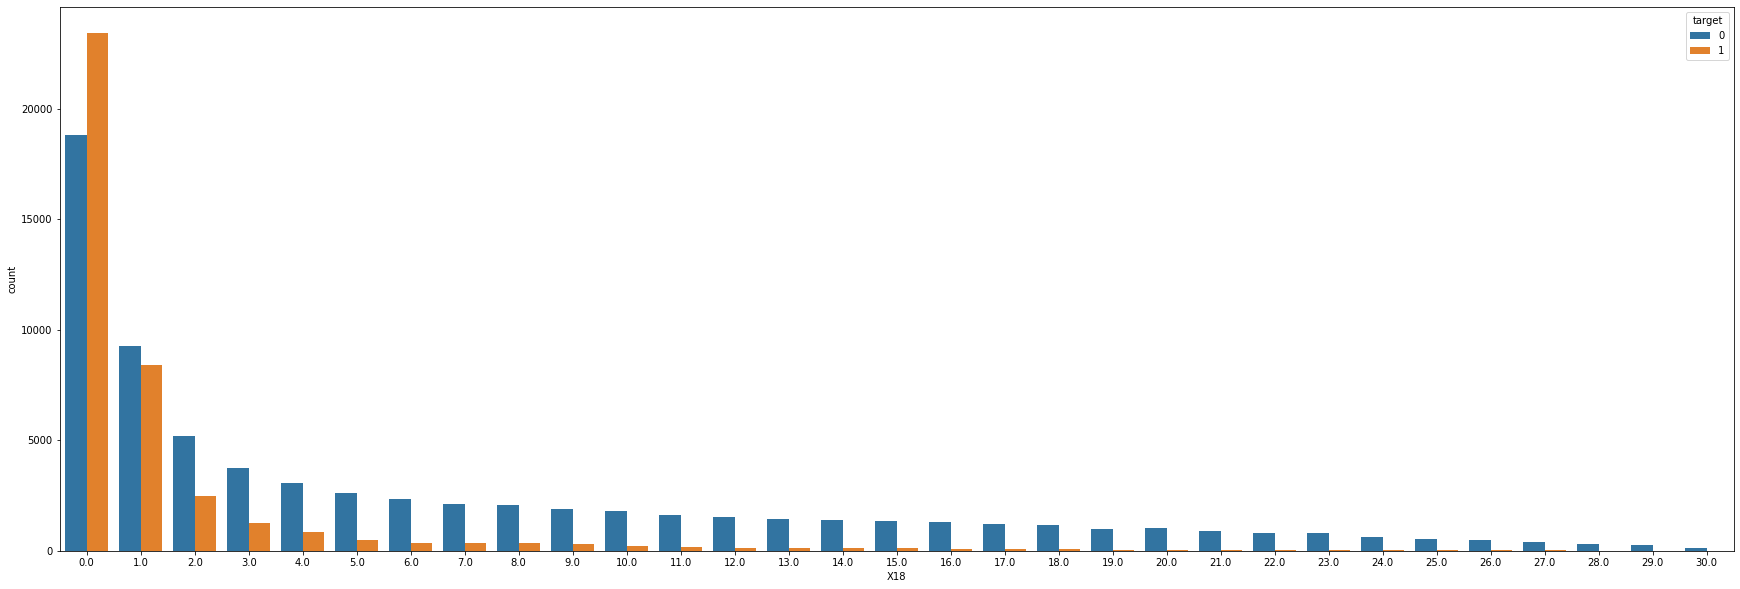

In [ ]:
plt.figure(figsize=(30,10))

sns.countplot(x='X18',hue='target', data=data)


##**Data Pre-Processing**

In [ ]:
data.dtypes

userId          int64
X1              int64
X2             object
X3            float64
X4            float64
X5            float64
X6            float64
X7            float64
X8            float64
X9              int64
X10             int64
X11             int64
X12             int64
X13             int64
X14             int64
X15             int64
X16             int64
X17             int64
X18           float64
X19           float64
X20             int64
X21           float64
X22            object
X23             int64
X24           float64
X25           float64
X26           float64
X27           float64
X28           float64
X29           float64
target          int64
year           object
month          object
date           object
year_month     object
dtype: object

In [ ]:
data.isnull().sum()

userId          0
X1              0
X2              0
X3              0
X4              0
X5              0
X6            268
X7              0
X8              0
X9              0
X10             0
X11             0
X12             0
X13             0
X14             0
X15             0
X16             0
X17             0
X18           264
X19             0
X20             0
X21             0
X22             0
X23             0
X24           259
X25             0
X26            17
X27            17
X28            17
X29            17
target          0
year            0
month           0
date            0
year_month      0
dtype: int64

Lets visualize the missing values

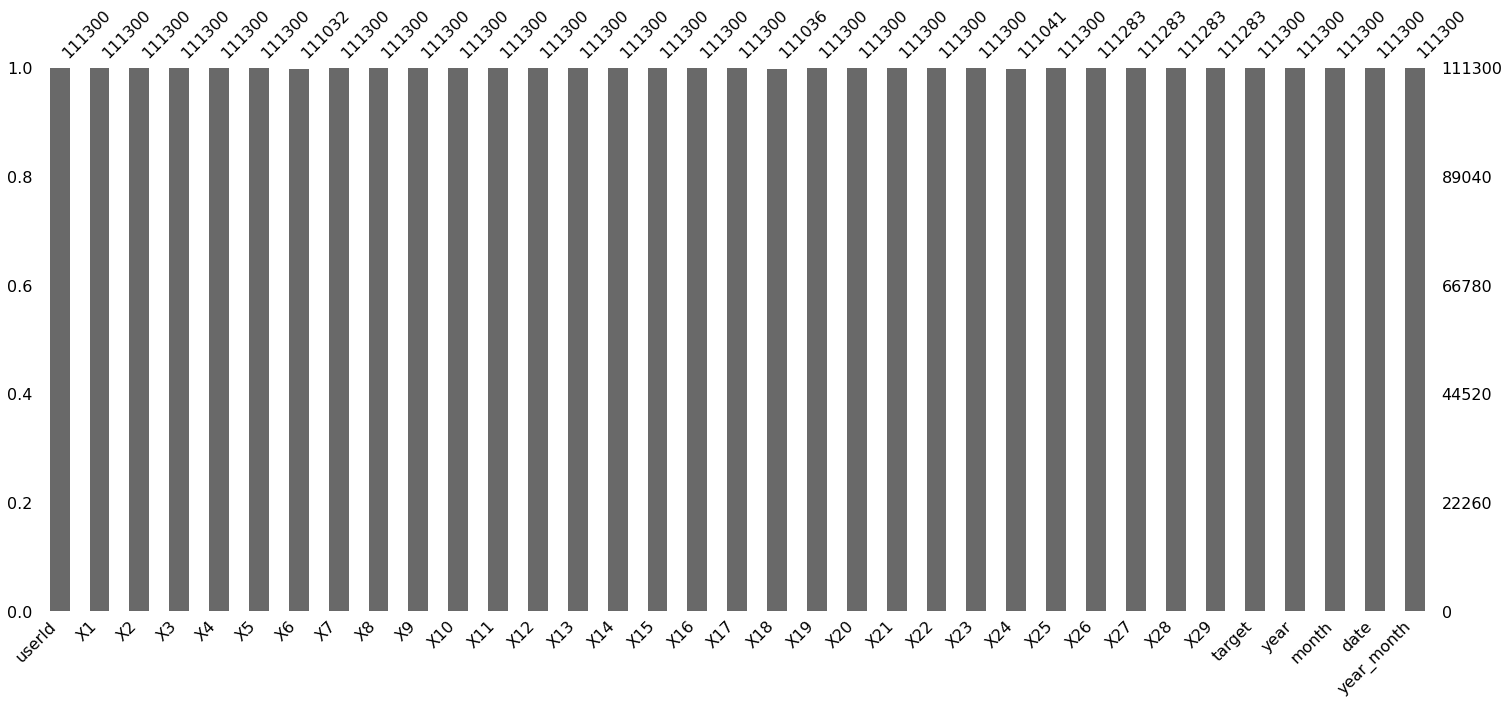

In [ ]:

msno.bar(data);

I will try to find any relation between different columns regarding missing columns.

A value near -1 means if one variable appears then the other variable is very likely to be missing.
A value near 0 means there is no dependence between the occurrence of missing values of two variables.
A value near 1 means if one variable appears then the other variable is very likely to be present.

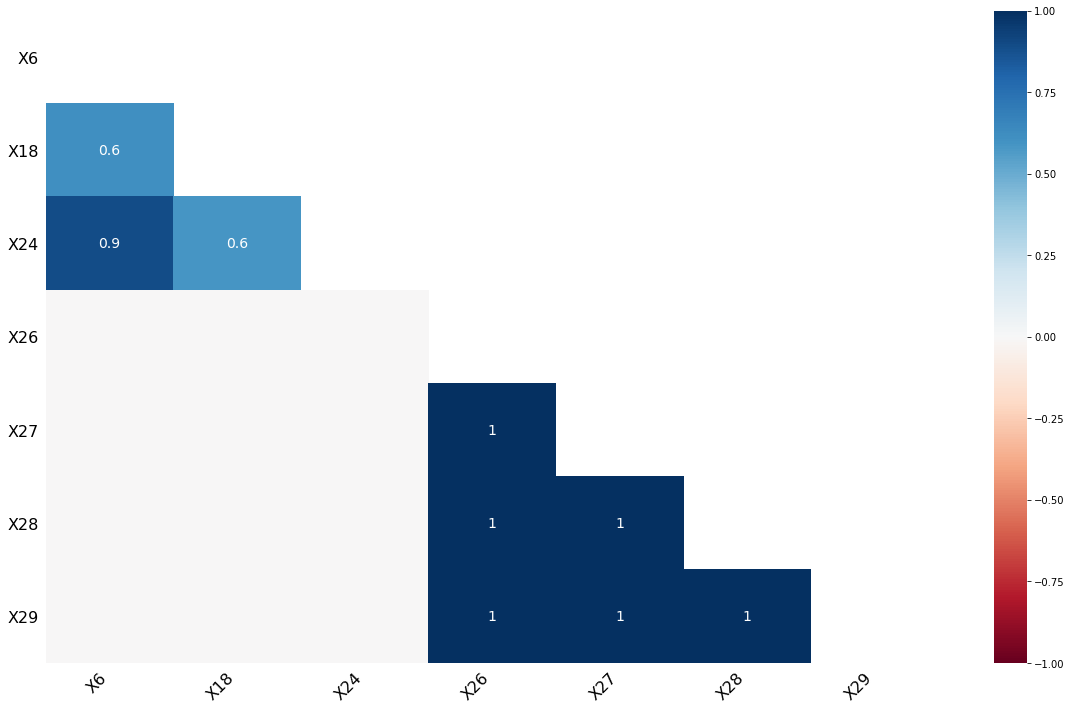

In [ ]:

msno.heatmap(data)

I could see the columns X26,X27,X28,X29 has missing values in same rows.

In [ ]:

data[np.isnan(data['X26'])&np.isnan(data['X27'])&np.isnan(data['X28'])&np.isnan(data['X29'])]


,userId,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,target,year,month,date,year_month
1843,1844,4,2017-12-28,30.000000,10.000000,10.0,0.0,0.000000,30.000000,2,1,6,1,0,0,2,23,1,0.0,0.000000,2,30.000000,M,31,0.0,0.00,NaN,NaN,NaN,NaN,1,2017,12,28,2017-12
4220,4221,4,2017-12-30,30.000000,10.000000,10.0,0.0,0.000000,30.000000,2,1,6,1,0,0,2,21,1,0.0,0.000000,2,30.000000,F,53,0.0,0.00,NaN,NaN,NaN,NaN,1,2017,12,30,2017-12
10096,10097,4,2017-10-12,30.000000,10.000000,10.0,0.0,0.000000,30.000000,3,2,6,1,0,0,3,18,1,0.0,0.000000,3,30.000000,F,20,0.0,0.00,NaN,NaN,NaN,NaN,1,2017,10,12,2017-10
12254,12255,4,2018-02-27,30.000000,10.000000,10.0,0.0,0.000000,30.000000,2,1,6,1,0,0,2,16,1,0.0,0.000000,2,30.000000,F,52,0.0,0.00,NaN,NaN,NaN,NaN,1,2018,02,27,2018-02
15210,15211,4,2018-01-16,30.000000,10.000000,10.0,0.0,0.000000,30.000000,2,1,6,1,0,0,2,4,1,0.0,0.000000,2,30.000000,F,36,0.0,0.00,NaN,NaN,NaN,NaN,1,2018,01,16,2018-01
16835,16836,4,2018-01-12,30.000000,10.000000,10.0,0.0,0.000000,30.000000,2,1,6,1,0,0,2,8,1,0.0,0.000000,2,30.000000,F,51,0.0,0.00,NaN,NaN,NaN,NaN,1,2018,01,12,2018-01
19647,19648,4,2017-10-24,30.000000,10.000000,10.0,0.0,0.000000,30.000000,2,1,6,1,0,0,2,6,2,0.0,0.000000,2,30.000000,F,23,0.0,0.00,NaN,NaN,NaN,NaN,1,2017,10,24,2017-10
20115,20116,4,2018-03-09,10.000000,10.000000,10.0,0.0,0.000000,10.000000,1,1,1,1,0,0,1,6,1,0.0,0.000000,1,10.000000,F,39,0.0,0.00,NaN,NaN,NaN,NaN,1,2018,03,09,2018-03
20888,20889,4,2017-10-08,30.000000,10.000000,10.0,0.0,0.000000,30.000000,2,1,6,1,0,0,2,22,1,0.0,0.000000,2,30.000000,M,45,0.0,0.00,NaN,NaN,NaN,NaN,1,2017,10,08,2017-10
24956,24957,4,2018-01-18,30.000000,10.000000,10.0,0.0,0.000000,30.000000,2,1,6,1,0,0,2,2,2,0.0,0.000000,2,30.000000,F,26,0.0,0.00,NaN,NaN,NaN,NaN,1,2018,01,18,2018-01


Now, I will try to find whether the missing values belongs to one target label or both target labels

From below observation, It can be clearly seen , all the missing values belongs to target label ='1'. I will fill the missing values using mean of the data that belongs to target label = '1' only.

In [ ]:
data1=data[data['target']==1]

In [ ]:
data1.shape

(40000, 35)

In [ ]:
data1['target'].unique()

array([1])

In [ ]:
data1.isnull().sum()

userId          0
X1              0
X2              0
X3              0
X4              0
X5              0
X6            268
X7              0
X8              0
X9              0
X10             0
X11             0
X12             0
X13             0
X14             0
X15             0
X16             0
X17             0
X18           264
X19             0
X20             0
X21             0
X22             0
X23             0
X24           259
X25             0
X26            17
X27            17
X28            17
X29            17
target          0
year            0
month           0
date            0
year_month      0
dtype: int64

In [ ]:
data1 = data1.fillna(data1.mean())

In [ ]:
data1.shape

(40000, 35)

In [ ]:
data1.isna().sum()

userId        0
X1            0
X2            0
X3            0
X4            0
X5            0
X6            0
X7            0
X8            0
X9            0
X10           0
X11           0
X12           0
X13           0
X14           0
X15           0
X16           0
X17           0
X18           0
X19           0
X20           0
X21           0
X22           0
X23           0
X24           0
X25           0
X26           0
X27           0
X28           0
X29           0
target        0
year          0
month         0
date          0
year_month    0
dtype: int64

In [ ]:
data2=data[data['target']==0]

In [ ]:
data2.shape

(71300, 35)

In [ ]:
data2['target'].unique()

array([0])

In [ ]:
data2.isnull().sum()

userId        0
X1            0
X2            0
X3            0
X4            0
X5            0
X6            0
X7            0
X8            0
X9            0
X10           0
X11           0
X12           0
X13           0
X14           0
X15           0
X16           0
X17           0
X18           0
X19           0
X20           0
X21           0
X22           0
X23           0
X24           0
X25           0
X26           0
X27           0
X28           0
X29           0
target        0
year          0
month         0
date          0
year_month    0
dtype: int64

In [ ]:
dataframes=[data1,data2]
data=pd.concat(dataframes)

In [ ]:
data.shape

(111300, 35)

In [ ]:
data.isna().sum()

userId        0
X1            0
X2            0
X3            0
X4            0
X5            0
X6            0
X7            0
X8            0
X9            0
X10           0
X11           0
X12           0
X13           0
X14           0
X15           0
X16           0
X17           0
X18           0
X19           0
X20           0
X21           0
X22           0
X23           0
X24           0
X25           0
X26           0
X27           0
X28           0
X29           0
target        0
year          0
month         0
date          0
year_month    0
dtype: int64

Now, I will convert object datatypes to int or float datatype

In [ ]:
data.dtypes

userId          int64
X1              int64
X2             object
X3            float64
X4            float64
X5            float64
X6            float64
X7            float64
X8            float64
X9              int64
X10             int64
X11             int64
X12             int64
X13             int64
X14             int64
X15             int64
X16             int64
X17             int64
X18           float64
X19           float64
X20             int64
X21           float64
X22            object
X23             int64
X24           float64
X25           float64
X26           float64
X27           float64
X28           float64
X29           float64
target          int64
year           object
month          object
date           object
year_month     object
dtype: object

I use Label Encoder to encode the categorical values of 'X22' column

In [ ]:
encoder=LabelEncoder()
data['X22']=encoder.fit_transform(data['X22'])

In [ ]:
data.head()

,userId,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,target,year,month,date,year_month
0,1,12,2018-01-12,536.950001,400.349998,20.0,57.297214,476.970004,59.979997,19,11,1703,1,0,16,16,7,2,1.382474,0.619001,5,42.780001,1,58,16.930802,0.00,5147.0,3.0,15443.0,3572.0,1,2018,01,12,2018-01
1,2,1,2017-10-28,90.000000,25.000000,10.0,57.297214,40.000000,50.000000,4,1,5,1,0,1,3,2,2,1.382474,0.444395,4,50.000000,0,29,16.930802,0.00,581.0,1.0,581.0,581.0,1,2017,10,28,2017-10
2,3,14,2017-12-30,1422.899999,1386.279999,15.0,500.000000,1855.659953,-432.759955,68,18,1315,1,1,24,27,4,3,19.000000,1.176471,5,-0.100000,0,36,16.930802,0.16,509.0,22.0,11212.0,107.0,1,2017,12,30,2017-12
3,4,14,2018-02-16,1494.000041,903.300028,90.0,57.297214,1344.060010,149.940031,12,4,3794,7,0,8,7,27,2,1.382474,0.899633,12,149.940031,1,20,16.930802,0.06,2382.0,6.0,14293.0,14293.0,1,2018,02,16,2018-02
4,5,1,2018-01-18,110.700000,74.540001,10.0,57.297214,75.740002,34.959998,8,3,61,1,0,4,6,2,2,1.382474,0.684130,8,34.959998,1,42,1.000000,0.00,2028.0,2.0,4057.0,2856.0,1,2018,01,18,2018-01


I convert other columns to numeric data type using pandas.

In [ ]:
data['year']=pd.to_numeric(data['year'])
data['month']=pd.to_numeric(data['month'])
data['date']=pd.to_numeric(data['date'])

In [ ]:
data=data.drop(['X2','year_month'],axis=1)


Now, there are no object datatypes

In [ ]:
data.dtypes

userId      int64
X1          int64
X3        float64
X4        float64
X5        float64
X6        float64
X7        float64
X8        float64
X9          int64
X10         int64
X11         int64
X12         int64
X13         int64
X14         int64
X15         int64
X16         int64
X17         int64
X18       float64
X19       float64
X20         int64
X21       float64
X22         int64
X23         int64
X24       float64
X25       float64
X26       float64
X27       float64
X28       float64
X29       float64
target      int64
year        int64
month       int64
date        int64
dtype: object

Now, I will try to detect outliers using Z-score methodology and remove them from data.

In [ ]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(data))
print(z)

[[1.73203525 0.58227113 0.10479627 ... 0.93608992 1.08555509 0.42546984]
 [1.73200412 1.16852349 0.13699403 ... 1.06827345 0.93883387 1.42337435]
 [1.731973   0.90059742 0.04097344 ... 1.06827345 1.38869809 1.65447987]
 ...
 [1.731973   0.90059742 0.13419532 ... 0.93608992 1.08555509 0.49895226]
 [1.73200412 0.90059742 0.14185666 ... 0.93608992 1.08555509 0.49895226]
 [1.73203525 0.90059742 0.13793054 ... 0.93608992 1.08555509 0.49895226]]


In [ ]:
threshold = 3
print(np.where(z > 3))

(array([     6,     10,     16, ..., 111291, 111297, 111297]), array([17, 19, 28, ..., 25, 25, 28]))


In [ ]:
data_af = data[(z < 3).all(axis=1)]


We could see the outliers have been removed.

In [ ]:
print(data.shape)
print(data_af.shape)

(111300, 33)
(93696, 33)


In [ ]:
data=data_af
data.shape

(93696, 33)

Using heatmap to find correlation between features. I could there is strong postive correlation between X3,X4 and X7.
Also there is strong positive correlation between X9,X10,X14 and 'X15'

Also, I found Sum of X7 and X8 columns gives X3 column. That is the reason these columns have correlation almost 1.

In [ ]:
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')

,userId,X1,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,target,year,month,date
userId,1.000000,-0.008146,0.098185,0.100361,0.093948,0.088557,0.100298,-0.001045,0.314596,0.234402,0.191796,0.182600,0.169294,0.266146,0.284267,-0.473148,0.203973,0.292814,0.062069,-0.083508,-0.121801,-0.032541,0.063881,0.047259,0.023915,-0.101700,0.328660,0.259170,-0.042562,-0.838727,0.254574,-0.245347,-0.006987
X1,-0.008146,1.000000,0.052115,0.056076,0.067998,0.031602,0.051504,0.016906,-0.070382,-0.029807,0.065729,0.064847,0.044628,0.038070,-0.081288,0.016966,-0.013101,0.007132,0.109399,-0.040072,0.020168,0.131713,-0.041951,0.037287,-0.004196,-0.071235,-0.049490,-0.089984,-0.051209,-0.011530,-0.038367,0.042008,0.001271
X3,0.098185,0.052115,1.000000,0.992370,0.681922,0.453162,0.995120,0.250133,0.254984,0.176916,0.477278,0.455227,0.231013,0.325246,0.258931,-0.109808,0.105895,0.104865,0.091890,-0.013635,0.153768,0.062732,0.029959,0.019035,0.060414,0.149670,0.225657,0.370604,0.082733,-0.125948,-0.029109,0.029457,0.005496
X4,0.100361,0.056076,0.992370,1.000000,0.672902,0.466580,0.991642,0.207893,0.254583,0.178221,0.475837,0.463250,0.240617,0.319389,0.256585,-0.115278,0.102628,0.107547,0.089161,-0.014732,0.131638,0.057984,0.027124,0.019274,0.059814,0.144175,0.228956,0.373044,0.082184,-0.127527,-0.021767,0.023886,-0.000384
X5,0.093948,0.067998,0.681922,0.672902,1.000000,0.438393,0.645753,0.492011,0.235408,0.149018,0.368583,0.625306,0.277380,0.283858,0.231336,-0.115693,0.084838,0.093171,0.061057,-0.021843,0.266373,0.074333,0.036135,0.012914,0.052583,0.083208,0.212625,0.306651,0.065229,-0.121167,-0.013496,0.019968,-0.010637
X6,0.088557,0.031602,0.453162,0.466580,0.438393,1.000000,0.510784,-0.485141,0.185758,0.142367,0.241354,0.314936,0.503419,0.206876,0.188918,-0.094700,0.099179,0.077702,0.074797,-0.039616,-0.089089,0.038471,-0.002316,-0.001726,0.042425,0.034585,0.184905,0.237460,0.016787,-0.110334,-0.006177,0.007715,-0.012946
X7,0.100298,0.051504,0.995120,0.991642,0.645753,0.510784,1.000000,0.154241,0.255389,0.180390,0.476083,0.440627,0.255486,0.324626,0.259831,-0.112509,0.107025,0.105066,0.098319,-0.013005,0.115506,0.059920,0.027129,0.018349,0.073726,0.150636,0.226882,0.372467,0.083774,-0.128116,-0.027061,0.027407,0.004103
X8,-0.001045,0.016906,0.250133,0.207893,0.492011,-0.485141,0.154241,1.000000,0.046061,0.000180,0.107699,0.235064,-0.196419,0.070579,0.041172,0.004594,0.009576,0.018396,-0.044855,-0.008627,0.405790,0.040455,0.033863,0.010815,-0.118397,0.021311,0.031636,0.054713,0.006573,-0.003595,-0.025230,0.025295,0.014372
X9,0.314596,-0.070382,0.254984,0.254583,0.235408,0.185758,0.255389,0.046061,1.000000,0.800129,0.547107,0.483800,0.361066,0.917535,0.960208,-0.365869,0.396240,0.742766,0.089921,0.076677,-0.126925,-0.082539,0.036780,0.033370,-0.010052,-0.067575,0.791307,0.704583,-0.037928,-0.371447,-0.032985,0.042993,-0.029846
X10,0.234402,-0.029807,0.176916,0.178221,0.149018,0.142367,0.180390,0.000180,0.800129,1.000000,0.386249,0.309462,0.250124,0.791859,0.829942,-0.267733,0.298390,0.433153,0.050104,0.203033,-0.109421,-0.092294,-0.023055,0.031261,-0.012757,0.074927,0.476356,0.513522,0.033408,-0.268254,-0.002089,0.008793,-0.014130


First , I will build the baseline models with out removing unwanted and correlated features and see how the models perform

In [ ]:
X=data.drop('target',axis=1)
y=data['target']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=2)

I use standard scaler to scale the data.

In [ ]:
st=StandardScaler()
st.fit(x_train)
x_train=pd.DataFrame(st.transform(x_train))
x_test=pd.DataFrame(st.transform(x_test))


##**Model Training and Testing**

Now I develop the baseline models, with out removing any unwanted features.
Every Naive Bayes, every moel gave almost 100 percent accuracy. Lets see that below

In [ ]:
seed = 7

results = []
names = []
scoring = 'accuracy'

models = []
models.append(('LR', LogisticRegression()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('XGB', XGBClassifier()))
models.append(('ADB', AdaBoostClassifier()))
models.append(('GRB', GradientBoostingClassifier()))
models.append(('MLP', MLPClassifier()))

for name, model in models:
	kfold = model_selection.KFold(n_splits=5, random_state=seed)
	cv_results = model_selection.cross_val_score(model, x_train, y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f " % (name, cv_results.mean())
	print(msg)

LR: 0.997515 
DT: 1.000000 
KNN: 0.943724 
NB: 0.843643 
RF: 1.000000 
XGB: 1.000000 
ADB: 1.000000 
GRB: 1.000000 
MLP: 0.997896 


Wow! except naive bayes, all models are giving great accuracy score.But Naive Bayes has very good Recall score on churned customers which is very important for this given prediction problem


In [ ]:
for name,model in models:
    trainedmodel = model.fit(x_train,y_train)
    
    # prediction
    ypredict = trainedmodel.predict(x_test)
    
    acc = accuracy_score(y_test,ypredict)
    classreport = classification_report(y_test,ypredict)
    confMat = confusion_matrix(y_test,ypredict)
    
    print('\n****************************'+name)
    print('The accuracy: {}'.format(acc))
    print('The Classification Report:\n {}'.format(classreport))
    print('The Confusion Matrix:\n {}'.format(confMat))
    


****************************LR
The accuracy: 0.997634022162324
The Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     21243
           1       1.00      1.00      1.00     12147

    accuracy                           1.00     33390
   macro avg       1.00      1.00      1.00     33390
weighted avg       1.00      1.00      1.00     33390

The Confusion Matrix:
 [[21219    24]
 [   55 12092]]

****************************DT
The accuracy: 1.0
The Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     21243
           1       1.00      1.00      1.00     12147

    accuracy                           1.00     33390
   macro avg       1.00      1.00      1.00     33390
weighted avg       1.00      1.00      1.00     33390

The Confusion Matrix:
 [[21243     0]
 [    0 12147]]

****************************KNN
The accuracy: 0.9630727762803234
Th

**Feature Importance**

Here , I will find the best features of the data by using various feature selection methods such as Forward Feature Selection , Backward Feature Selection, Extra Trees classifier and In built feature importance for models such as XGB and Random Forest

In [ ]:
X.shape

(93696, 33)

In [ ]:
y.shape

(93696,)

In [ ]:
X1=X.values
y1=y.values

In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector
lr=LogisticRegression()
lr.fit(X1,y1)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Backward Feature Selection

In [ ]:
bfe=SequentialFeatureSelector(lr, k_features='best',forward=False, n_jobs=-1)
bfe.fit(X1,y1)
features=list(bfe.k_feature_names_)
features=list(map(int,features))
print(features)


[0, 10, 15, 21, 22, 25]


Forward Feature Selection

In [ ]:
ffe=SequentialFeatureSelector(lr, k_features='best',forward=True, n_jobs=-1)
ffe.fit(X1,y1)
features=list(bfe.k_feature_names_)
features=list(map(int,features))
print(features)


[0, 10, 15, 21, 22, 25]


Feature Selection using In-Built  feature importance in Extra Tress Classifier

[0.55022557 0.00457829 0.00470742 0.00463099 0.00531991 0.00310923
 0.00471593 0.0047752  0.02442569 0.00972683 0.00927226 0.00888331
 0.00680676 0.01525316 0.01456631 0.12739767 0.00765959 0.02100943
 0.00545087 0.00966155 0.00693611 0.00297451 0.00557188 0.00314959
 0.00463084 0.00722145 0.03901336 0.01682734 0.00658703 0.00793751
 0.02211974 0.01006023 0.02479444]


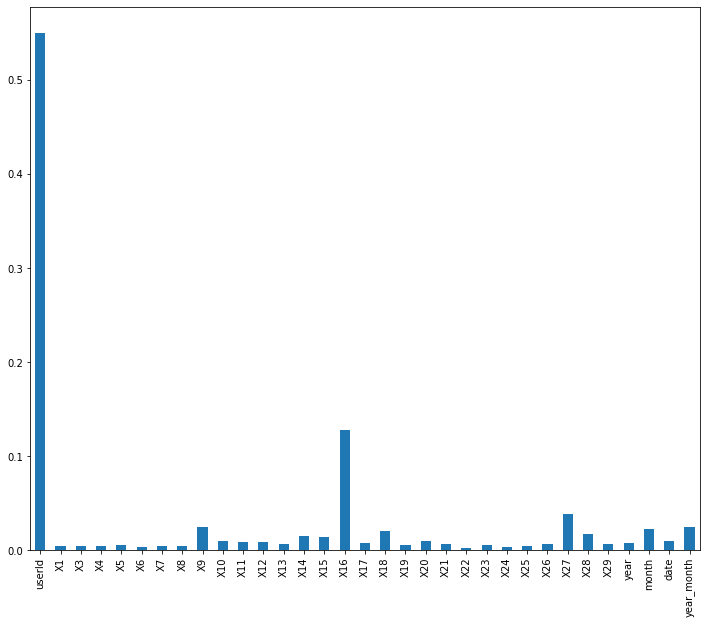

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) 
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
plt.figure(figsize=(12,10))

feat_importances.plot(kind='bar')
plt.show()

Feature Selection using In-Built  feature importance in XGB  Classifier

Feature: 0, Score: 1.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000


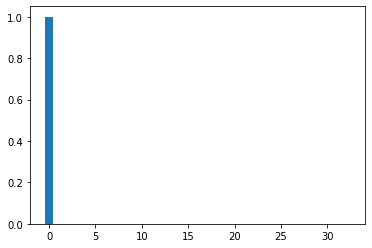

In [ ]:
model = XGBClassifier()
model.fit(X, y)
importance = model.feature_importances_
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
plt.bar([x for x in range(len(importance))], importance)
plt.show()

Feature Selection using In-Built  feature importance in Random Forest Classifier

Feature: 0, Score: 0.71217
Feature: 1, Score: 0.00101
Feature: 2, Score: 0.00314
Feature: 3, Score: 0.00446
Feature: 4, Score: 0.00553
Feature: 5, Score: 0.00237
Feature: 6, Score: 0.00401
Feature: 7, Score: 0.00380
Feature: 8, Score: 0.02916
Feature: 9, Score: 0.00318
Feature: 10, Score: 0.00618
Feature: 11, Score: 0.00790
Feature: 12, Score: 0.00180
Feature: 13, Score: 0.00527
Feature: 14, Score: 0.00940
Feature: 15, Score: 0.08349
Feature: 16, Score: 0.00188
Feature: 17, Score: 0.02379
Feature: 18, Score: 0.00244
Feature: 19, Score: 0.00352
Feature: 20, Score: 0.01587
Feature: 21, Score: 0.00036
Feature: 22, Score: 0.00238
Feature: 23, Score: 0.00090
Feature: 24, Score: 0.00483
Feature: 25, Score: 0.00418
Feature: 26, Score: 0.02879
Feature: 27, Score: 0.01735
Feature: 28, Score: 0.00372
Feature: 29, Score: 0.00029
Feature: 30, Score: 0.00177
Feature: 31, Score: 0.00368
Feature: 32, Score: 0.00137


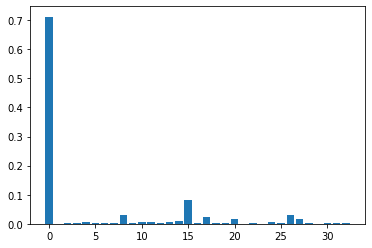

In [ ]:
model = RandomForestClassifier()
model.fit(X, y)
importance = model.feature_importances_
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
plt.bar([x for x in range(len(importance))], importance)
plt.show()

The column 'userID' is unique and it has 111300 distinct values.This is suppressing the the other feature imporance by overfitting into the model. If the 'userID' column is related to timeseries data or following any pattern , then it has its importance on the model but here every person has different unique userID and has no specific pattern.

Now, I try to drop userId column and some of the variables which are in high correlation with other variables and run the models again to see any difference.

After that I will find most importnat features using inbuilt feature importance and other feature selection methods and try to run the models using the most important features.

At end I will compare the results of the models with most important features and models with features after dropping user id and correlated features.

Finding correlated features. I keep threshold value greater than 90.

In [ ]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = data.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [ ]:
corr_features = correlation(x_train, 0.9)
print(len(set(corr_features)))
print(corr_features)

5
{'X14', 'month', 'X15', 'X7', 'X4'}


In [ ]:
data=data.drop(corr_features,axis=1)

In [ ]:
data=data.drop(['userId','year'],axis=1)

No userId and correlated features columns in the data

In [ ]:
data.shape

(93696, 26)

In [ ]:
X=data.drop('target',axis=1)
y=data['target']

In [ ]:
X.shape

(93696, 25)

In [ ]:
counter = Counter(y)
print(counter)

Counter({0: 57224, 1: 36472})


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=2)

In [ ]:
scaler=StandardScaler()
scaler.fit(x_train)
x_train=pd.DataFrame(scaler.transform(x_train))
x_test=pd.DataFrame(scaler.transform(x_test))


It can be seen the accuracy and other metrics has considerably reduced 

In [ ]:
seed = 7

results = []
names = []
scoring = 'accuracy'

models = []
models.append(('LR', LogisticRegression()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('XGB', XGBClassifier()))
models.append(('ADB', AdaBoostClassifier()))
models.append(('GRB', GradientBoostingClassifier()))
models.append(('MLP', MLPClassifier()))

for name, model in models:
	kfold = model_selection.KFold(n_splits=5, random_state=seed)
	cv_results = model_selection.cross_val_score(model, x_train, y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f " % (name, cv_results.mean())
	print(msg)

LR: 0.795889 
DT: 0.733758 
KNN: 0.778294 
NB: 0.647308 
RF: 0.817144 
XGB: 0.816351 
ADB: 0.810511 
GRB: 0.815665 
MLP: 0.808346 


In [ ]:


# evaluate each model in turn

for name,model in models:
    trainedmodel = model.fit(x_train,y_train)
    # prediction
    ypredict = trainedmodel.predict(x_test)
    
    acc = accuracy_score(y_test,ypredict)

    classreport = classification_report(y_test,ypredict)
    confMat = confusion_matrix(y_test,ypredict)
    roc_auc= roc_auc_score(y_test,ypredict)
    
    print('\n****************************'+name)
    print('The accuracy: {}'.format(acc))
    print('roc-auc:{}'.format(roc_auc)
    print('The Classification Report:\n {}'.format(classreport))
    print('The Confusion Matrix:\n {}'.format(confMat))
    


****************************LR
The accuracy: 0.7956170621509125
The Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.88      0.84     17143
           1       0.78      0.67      0.72     10966

    accuracy                           0.80     28109
   macro avg       0.79      0.77      0.78     28109
weighted avg       0.79      0.80      0.79     28109

The Confusion Matrix:
 [[15024  2119]
 [ 3626  7340]]

****************************DT
The accuracy: 0.7309046924472589
The Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.77      0.78     17143
           1       0.65      0.66      0.66     10966

    accuracy                           0.73     28109
   macro avg       0.72      0.72      0.72     28109
weighted avg       0.73      0.73      0.73     28109

The Confusion Matrix:
 [[13280  3863]
 [ 3701  7265]]

****************************KNN
The accuracy: 0.781

**Hyper-Parameter Tuning**

Out of all the classifiers XGB classifier gave good results interms of metrics accuracy and recall. 



Out of all the classifier Naive Bayes model has given very good Recall rate for label 1. Which is very important.

I will tune hyperparmeters to increase the performance.


In [ ]:
param_test3 = {
   'min_child_weight':[6,8,10,12],
   'max_depth':range(5,16,2),
   'gamma':[i/10.0 for i in range(0,5)]
}
gsearch3 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=4,
 min_child_weight=6, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test3, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch3.fit(x_train,y_train)
gsearch3.cv_results_, gsearch3.best_params_, gsearch3.best_score_

({'mean_fit_time': array([ 3.74542146,  3.67920537,  3.67278781,  3.63350573,  5.39348812,
          5.33177619,  5.33596845,  5.29950809,  7.28783607,  6.94914079,
          6.91216793,  7.01652818,  8.89541388,  8.77537932,  8.48416486,
          8.2946713 , 10.72339301, 10.3197681 , 10.03411169,  9.85705719,
         12.39391975, 12.04663882, 11.57544265, 11.34893241,  3.57438173,
          3.5206028 ,  3.51669445,  3.56997094,  5.30372086,  5.33066196,
          5.25188966,  5.20007501,  7.09446712,  6.95006552,  6.8527576 ,
          6.86097183,  8.92786665,  8.76094809,  8.5780633 ,  8.39877505,
         10.72610512, 10.3266778 , 10.21274419, 10.04876785, 12.31383834,
         12.07618656, 11.63551159, 11.39017191,  3.59432597,  3.5334517 ,
          3.53016663,  3.52284327,  5.24242282,  5.11002588,  5.03488555,
          5.09050303,  7.00247087,  6.95430684,  6.7880816 ,  6.70815716,
          8.89182148,  8.68801198,  8.40851622,  8.36436396, 10.58652983,
         10.27836924,

In [ ]:
param_test6 = {
 'subsample':[i/100.0 for i in range(75,90,5)],
 'colsample_bytree':[i/100.0 for i in range(75,90,5)],
 'reg_alpha':[0, 0.001, 0.005, 0.01, 0.05]
}
gsearch5 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=177, max_depth=5,
 min_child_weight=6, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test6, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch5.fit(x_train,y_train)
gsearch5.cv_results_, gsearch5.best_params_, gsearch5.best_score_

({'mean_fit_time': array([4.37328801, 4.21547236, 4.1010891 , 4.27733727, 4.22805099,
         4.1666646 , 4.20870466, 4.15730309, 4.17526364, 4.2760005 ,
         4.1256999 , 4.09139376, 4.17447696, 4.13828359, 4.05948315,
         4.41992998, 4.38829436, 4.25019379, 4.40843921, 4.38244038,
         4.24974055, 4.42757373, 4.37074509, 4.24268322, 4.41542954,
         4.32815781, 4.2400353 , 4.4554729 , 4.32804189, 4.27504888,
         4.54281111, 4.46117454, 4.41993446, 4.54540105, 4.46601157,
         4.40282369, 4.54934549, 4.47626796, 4.42351637, 4.54653707,
         4.48592472, 4.44107289, 4.54158506, 4.48468041, 4.39146767]),
  'mean_score_time': array([0.04338417, 0.04251986, 0.04291091, 0.04307904, 0.04212265,
         0.04181962, 0.04162164, 0.04140148, 0.04173388, 0.04227486,
         0.04134216, 0.04156227, 0.04198966, 0.04152427, 0.04156046,
         0.04226012, 0.04168239, 0.04178391, 0.04231892, 0.0415884 ,
         0.04200392, 0.04180427, 0.04148784, 0.04136744, 0.041762

We could see there is slight increase in the performance of the model.

In [ ]:
xgbclf=XGBClassifier(gamma=0.0, max_depth=5, min_child_weight=6,colsample_bytree=0.75, reg_alpha=0.05, subsample=0.8)
xgbclf.fit(x_train,y_train)
pred=xgbclf.predict(x_test)
print(accuracy_score(y_test,pred))

0.8201999359635704


In [ ]:
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))
print('roc_auc' , roc_auc_score(y_test,pred))

              precision    recall  f1-score   support

           0       0.85      0.86      0.85     17143
           1       0.78      0.76      0.77     10966

    accuracy                           0.82     28109
   macro avg       0.81      0.81      0.81     28109
weighted avg       0.82      0.82      0.82     28109

[[14774  2369]
 [ 2685  8281]]
roc_auc 0.8084808869069504


Now, I will try to check the model performace by balancing the labels.
I use smote to balance the data.

In [ ]:
x1=X
y1=y

In [ ]:
counter = Counter(y1)
print(counter)
# transform the dataset
oversample = SMOTE()
x1, y1 = oversample.fit_resample(x1, y1)
# summarize the new class distribution
counter = Counter(y1)
print(counter)

Counter({0: 57224, 1: 36472})
Counter({1: 57224, 0: 57224})


In [ ]:
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.3,random_state=2)

In [ ]:
scaler=StandardScaler()
scaler.fit(x1_train)
x1_train=pd.DataFrame(scaler.transform(x1_train))
x1_test=pd.DataFrame(scaler.transform(x1_test))


The performance of the model has incresed by balancing the data

In [ ]:
xgbclf.fit(x1_train,y1_train)
pred1=xgbclf.predict(x1_test)
print(accuracy_score(y1_test,pred1))

0.8487840396097277


In [ ]:
print(classification_report(y1_test,pred1))
print(confusion_matrix(y1_test,pred1))
print('roc_auc' , roc_auc_score(y1_test,pred1))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85     17135
           1       0.85      0.84      0.85     17200

    accuracy                           0.85     34335
   macro avg       0.85      0.85      0.85     34335
weighted avg       0.85      0.85      0.85     34335

[[14621  2514]
 [ 2678 14522]]
roc_auc 0.848792540088626


HyperParamter tuning for Naive Bayes Classifier

In [ ]:
nb_classifier = GaussianNB()

params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gs_NB = GridSearchCV(estimator=nb_classifier, 
                 param_grid=params_NB, 
                 cv=5,   # use any cross validation technique 
                 verbose=1, 
                 scoring='accuracy') 
gs_NB.fit(x_train, y_train)

gs_NB.best_params_

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:   17.0s finished


{'var_smoothing': 0.0006579332246575676}

In [ ]:
nb_classifier = GaussianNB(var_smoothing=0.0006579332246575676)


In [ ]:
nb_classifier.fit(x_train,y_train)
pred=nb_classifier.predict(x_test)
print(accuracy_score(y_test,pred))
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))
print('roc_auc' , roc_auc_score(y_test,pred))


0.6498274573979864
              precision    recall  f1-score   support

           0       0.87      0.50      0.63     17143
           1       0.53      0.89      0.66     10966

    accuracy                           0.65     28109
   macro avg       0.70      0.69      0.65     28109
weighted avg       0.74      0.65      0.65     28109

[[8524 8619]
 [1224 9742]]
roc_auc 0.6928057311176611


Testing model on balanced dataset

In [ ]:
nb_classifier.fit(x1_train,y1_train)
pred2=nb_classifier.predict(x1_test)
print(accuracy_score(y1_test,pred2))

0.691859618465123


In [ ]:
print(classification_report(y1_test,pred2))
print(confusion_matrix(y1_test,pred2))
print('roc_auc' , roc_auc_score(y1_test,pred2))

              precision    recall  f1-score   support

           0       0.82      0.49      0.61     17135
           1       0.64      0.89      0.74     17200

    accuracy                           0.69     34335
   macro avg       0.73      0.69      0.68     34335
weighted avg       0.73      0.69      0.68     34335

[[ 8430  8705]
 [ 1875 15325]]
roc_auc 0.6914819304293538


**Feature Importance and Feature Selection after dropping userId and correlated features**

As user Id and other correlated features dropped, now I will try to find the important features and run on the models with important features.

In [ ]:
X1=X.values
y1=y.values

In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector
lr=LogisticRegression()
lr.fit(X1,y1)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
bfe=SequentialFeatureSelector(lr, k_features='best',forward=False, n_jobs=-1)
bfe.fit(X1,y1)
features=list(bfe.k_feature_names_)
features=list(map(int,features))
print(features)


[1, 3, 4, 5, 10, 15, 19, 21]


In [ ]:
ffe=SequentialFeatureSelector(lr, k_features='best',forward=True, n_jobs=-1)
ffe.fit(X1,y1)
features=list(bfe.k_feature_names_)
features=list(map(int,features))
print(features)


[1, 3, 4, 5, 10, 15, 19, 21]


[0.02481498 0.02868274 0.02294023 0.0104789  0.02735154 0.05057685
 0.03459148 0.03901917 0.02703661 0.01690627 0.24082308 0.02751819
 0.05694193 0.02930882 0.03255228 0.03123769 0.01471028 0.03124482
 0.01436256 0.02583695 0.03373916 0.06994623 0.04388786 0.03311527
 0.03237611]


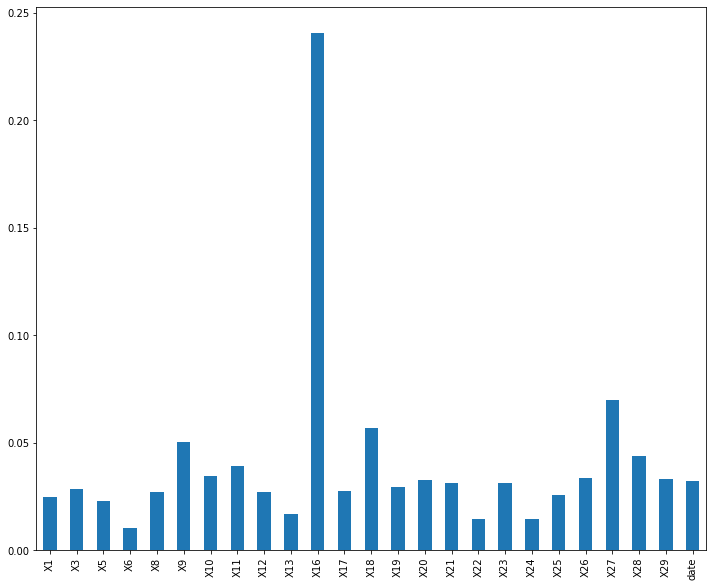

In [ ]:
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
plt.figure(figsize=(12,10))

feat_importances.plot(kind='bar')
plt.show()

Feature: 0, Score: 0.00701
Feature: 1, Score: 0.01389
Feature: 2, Score: 0.02850
Feature: 3, Score: 0.01014
Feature: 4, Score: 0.00599
Feature: 5, Score: 0.00429
Feature: 6, Score: 0.00367
Feature: 7, Score: 0.02381
Feature: 8, Score: 0.07803
Feature: 9, Score: 0.02727
Feature: 10, Score: 0.32258
Feature: 11, Score: 0.00919
Feature: 12, Score: 0.05102
Feature: 13, Score: 0.00562
Feature: 14, Score: 0.00997
Feature: 15, Score: 0.04437
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00723
Feature: 18, Score: 0.02077
Feature: 19, Score: 0.02010
Feature: 20, Score: 0.01245
Feature: 21, Score: 0.26869
Feature: 22, Score: 0.01507
Feature: 23, Score: 0.00736
Feature: 24, Score: 0.00298


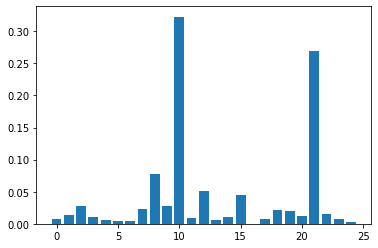

In [ ]:
model = XGBClassifier()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

Feature: 0, Score: 0.01449
Feature: 1, Score: 0.03922
Feature: 2, Score: 0.02259
Feature: 3, Score: 0.01068
Feature: 4, Score: 0.03904
Feature: 5, Score: 0.05736
Feature: 6, Score: 0.02326
Feature: 7, Score: 0.04710
Feature: 8, Score: 0.02841
Feature: 9, Score: 0.00725
Feature: 10, Score: 0.21019
Feature: 11, Score: 0.01191
Feature: 12, Score: 0.03788
Feature: 13, Score: 0.03387
Feature: 14, Score: 0.02340
Feature: 15, Score: 0.06504
Feature: 16, Score: 0.00577
Feature: 17, Score: 0.03355
Feature: 18, Score: 0.00907
Feature: 19, Score: 0.02774
Feature: 20, Score: 0.04055
Feature: 21, Score: 0.08300
Feature: 22, Score: 0.05562
Feature: 23, Score: 0.04065
Feature: 24, Score: 0.03237


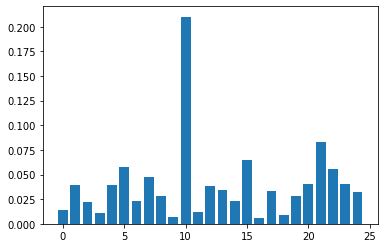

In [ ]:
model = RandomForestClassifier()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

Taking the mostimporant features into consideration and running the models. This reduces overfitting as the dimensionality has reduced.

In [ ]:
x_train[features]


,1,3,4,5,10,15,19,21
0,9.457044,4.323294,6.545829,1.609827,-0.957628,-0.148078,-0.096698,3.070737
1,-0.312727,-0.254067,0.031789,-0.760381,-0.836783,-0.290178,-0.109692,-0.705699
2,0.346536,0.260244,0.079744,1.609827,-0.957628,-0.078835,-0.105106,2.586578
3,-0.038722,-0.254067,0.178381,0.215587,0.492511,-0.160309,-0.106890,0.165786
4,-0.400602,-0.254067,-0.236713,-0.830093,-0.111713,-0.281350,-0.107909,-0.415204
...,...,...,...,...,...,...,...,...
65582,-0.209543,0.054520,-0.372077,2.446371,-0.836783,-0.280074,-0.107909,4.232717
65583,-0.339626,-0.254067,-0.059075,-0.934661,1.217581,0.240679,-0.109947,-0.705699
65584,0.304237,-0.254067,0.416882,1.052131,-0.232558,-0.290391,-0.109947,2.199252
65585,-0.241258,-0.254067,-0.123485,0.076163,1.338426,-0.284754,-0.105616,-0.221540


Models giving same almost same result with most important features

In [ ]:
seed = 7

results = []
names = []
scoring = 'accuracy'

models = []
models.append(('LR', LogisticRegression()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('XGB', XGBClassifier()))
models.append(('ADB', AdaBoostClassifier()))
models.append(('GRB', GradientBoostingClassifier()))
models.append(('MLP', MLPClassifier()))

for name, model in models:
	kfold = model_selection.KFold(n_splits=5, random_state=seed)
	cv_results = model_selection.cross_val_score(model, x_train[features], y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f " % (name, cv_results.mean())
	print(msg)

LR: 0.791300 
DT: 0.729581 
KNN: 0.786635 
NB: 0.666885 
RF: 0.809139 
XGB: 0.812951 
ADB: 0.808773 
GRB: 0.813164 
MLP: 0.811441 


In [ ]:
for name,model in models:
    trainedmodel = model.fit(x_train[features],y_train)
    
    ypredict = trainedmodel.predict(x_test[features])
    
    acc = accuracy_score(y_test,ypredict)

    classreport = classification_report(y_test,ypredict)
    confMat = confusion_matrix(y_test,ypredict)
    
    print('\n****************************'+name)
    print('The accuracy: {}'.format(acc))
    print('The Classification Report:\n {}'.format(classreport))
    print('The Confusion Matrix:\n {}'.format(confMat))
    


****************************LR
The accuracy: 0.7884663275107617
The Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.87      0.83     17143
           1       0.77      0.66      0.71     10966

    accuracy                           0.79     28109
   macro avg       0.78      0.76      0.77     28109
weighted avg       0.79      0.79      0.78     28109

The Confusion Matrix:
 [[14979  2164]
 [ 3782  7184]]

****************************DT
The accuracy: 0.7296951154434522
The Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.78      0.78     17143
           1       0.65      0.66      0.66     10966

    accuracy                           0.73     28109
   macro avg       0.72      0.72      0.72     28109
weighted avg       0.73      0.73      0.73     28109

The Confusion Matrix:
 [[13289  3854]
 [ 3744  7222]]

****************************KNN
The accuracy: 0.786

**Hyperparameter tuning of best models with important features**

Gradient Boosting classifier has given good results using data with important features. 
Again Naive Bayes has very good Recall on label 1

I will tune the hyperparameters to increase the model perfromance

In [ ]:
from sklearn.model_selection import GridSearchCV

param_test1 = {'max_depth':range(5,16,2), 'min_samples_split':range(200,1001,200)}
gsearch2 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=60, max_features='sqrt', subsample=0.8, random_state=10), 
param_grid = param_test1, scoring='accuracy',n_jobs=4,iid=False, cv=5)
gsearch2.fit(x_train[features],y_train)
gsearch2.cv_results_, gsearch2.best_params_, gsearch2.best_score_

({'mean_fit_time': array([2.81066108, 2.78512688, 2.78603511, 2.76481471, 2.77819433,
         3.66291728, 3.60511112, 3.53225555, 3.51555028, 3.4965229 ,
         4.56795688, 4.35417018, 4.20375638, 4.12249951, 4.01163588,
         5.26628299, 4.97568636, 4.78214293, 4.65615053, 4.51546822,
         6.03550334, 5.54497161, 5.25391984, 5.05450492, 4.90627952,
         6.66193748, 6.02029347, 5.68723459, 5.43731065, 5.24867611]),
  'mean_score_time': array([0.02778573, 0.02774396, 0.0279182 , 0.02769146, 0.02776952,
         0.03647695, 0.03591599, 0.03545322, 0.03543558, 0.03481541,
         0.04558263, 0.04398084, 0.04217048, 0.04172635, 0.04078741,
         0.0550169 , 0.05129132, 0.04948845, 0.04733934, 0.04626684,
         0.06464014, 0.05839586, 0.05518146, 0.05307546, 0.0507369 ,
         0.07296243, 0.0648582 , 0.06054988, 0.05702024, 0.05444784]),
  'mean_test_score': array([0.81366735, 0.81401803, 0.81417047, 0.81374357, 0.81340813,
         0.81430773, 0.81450589, 0.81444493,

In [ ]:
param_test1 = {'min_samples_split':range(1000,2100,200), 'min_samples_leaf':range(30,71,10)}
gsearch3 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=60,max_depth=11,max_features='sqrt', subsample=0.8, random_state=10), 
param_grid = param_test2, scoring='accuracy',n_jobs=4,iid=False, cv=5)
gsearch3.fit(x_train[features],y_train)
gsearch3.cv_results_, gsearch3.best_params_, gsearch3.best_score_

({'mean_fit_time': array([2.81984067, 2.79884892, 2.79496303, 2.78982716, 2.78647232,
         3.65414338, 3.59079256, 3.53766685, 3.51533694, 3.46363177,
         4.50393343, 4.33529544, 4.23096337, 4.15456185, 4.05251212,
         5.31290412, 5.00399504, 4.80122566, 4.67756886, 4.54214864,
         6.1023026 , 5.63212876, 5.32257357, 5.10686116, 4.92101369,
         6.68592377, 6.06343694, 5.69166899, 5.50256476, 5.39106059]),
  'mean_score_time': array([0.0276628 , 0.02794151, 0.02785864, 0.02761641, 0.02783885,
         0.03607364, 0.03600945, 0.03537631, 0.0350821 , 0.03456984,
         0.04506793, 0.04389448, 0.04237947, 0.04184337, 0.04084282,
         0.0551929 , 0.05117645, 0.0493576 , 0.04749465, 0.04617548,
         0.06484766, 0.05872416, 0.05545406, 0.0528192 , 0.05061846,
         0.0728497 , 0.06479282, 0.06046376, 0.05716968, 0.05462289]),
  'mean_test_score': array([0.81366735, 0.81401803, 0.81417047, 0.81374357, 0.81340813,
         0.81430773, 0.81450589, 0.81444493,

In [ ]:
param_test3 = {'subsample':[0.6,0.7,0.75,0.8,0.85,0.9]}
gsearch5 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=60,max_depth=11,min_samples_split=400, min_samples_leaf=60, subsample=0.8, random_state=10,max_features='sqrt'),
param_grid = param_test3, scoring='accuracy',n_jobs=4,iid=False, cv=5)
gsearch5.fit(x_train[features],y_train)
gsearch5.cv_results_, gsearch5.best_params_, gsearch5.best_score_

({'mean_fit_time': array([3.99753036, 4.48682842, 4.7041223 , 4.9601994 , 5.20235462,
         5.42572885]),
  'mean_score_time': array([0.05071445, 0.05187874, 0.05221128, 0.05260739, 0.05298114,
         0.05341721]),
  'mean_test_score': array([0.81513104, 0.81548173, 0.81517682, 0.81433821, 0.81503956,
         0.81537499]),
  'param_subsample': masked_array(data=[0.6, 0.7, 0.75, 0.8, 0.85, 0.9],
               mask=[False, False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'subsample': 0.6},
   {'subsample': 0.7},
   {'subsample': 0.75},
   {'subsample': 0.8},
   {'subsample': 0.85},
   {'subsample': 0.9}],
  'rank_test_score': array([4, 1, 3, 6, 5, 2], dtype=int32),
  'split0_test_score': array([0.81430096, 0.81361488, 0.81323372, 0.81399604, 0.81323372,
         0.81346242]),
  'split1_test_score': array([0.81613051, 0.81689282, 0.81521573, 0.81437719, 0.81696905,
         0.81773136]),
  'split2_test_score': array([0.81161851

In [ ]:
grb=GradientBoostingClassifier(learning_rate=0.05, n_estimators=120,max_depth=11, min_samples_split=400,min_samples_leaf=60, subsample=0.70, random_state=10)

In [ ]:
grb.fit(x_train[features],y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.05, loss='deviance', max_depth=11,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=60, min_samples_split=400,
                           min_weight_fraction_leaf=0.0, n_estimators=120,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=10, subsample=0.7, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

It can be seen that there is slight improvemant in metrics by hyper-paramter tuning

In [ ]:
y_pred=grb.predict(x_test[features])
print(accuracy_score(y_test,y_pred))

0.8162510228040841


In [ ]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print('roc_auc',roc_auc_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85     17143
           1       0.77      0.75      0.76     10966

    accuracy                           0.82     28109
   macro avg       0.81      0.81      0.81     28109
weighted avg       0.82      0.82      0.82     28109

[[14675  2468]
 [ 2697  8269]]
roc_auc 0.8050462652461057


Testing Model Performace with balanced data. With the balanced data there is lot of improvemant in model performance.

In [ ]:
grb.fit(x1_train[features],y1_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.05, loss='deviance', max_depth=11,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=60, min_samples_split=400,
                           min_weight_fraction_leaf=0.0, n_estimators=120,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=10, subsample=0.7, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
y_pred1=grb.predict(x1_test[features])
print(accuracy_score(y1_test,y_pred1))

0.8447939420416485


In [ ]:
print(classification_report(y1_test,y_pred1))
print(confusion_matrix(y1_test,y_pred1))
print('roc_auc',roc_auc_score(y1_test,y_pred1))

              precision    recall  f1-score   support

           0       0.85      0.84      0.84     17135
           1       0.84      0.85      0.85     17200

    accuracy                           0.84     34335
   macro avg       0.84      0.84      0.84     34335
weighted avg       0.84      0.84      0.84     34335

[[14452  2683]
 [ 2646 14554]]
roc_auc 0.8447913457427677


The Gaussian Naive Bayes model has high Recall compare to other values. Lets tune hyperparamters and improve the performance on important features, which is most important metric for this problem

In [ ]:
nb_classifier = GaussianNB()

params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gs_NB = GridSearchCV(estimator=nb_classifier, 
                 param_grid=params_NB, 
                 cv=5,   # use any cross validation technique 
                 verbose=1, 
                 scoring='accuracy') 
gs_NB.fit(x_train[features], y_train)

gs_NB.best_params_

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    9.1s finished


{'var_smoothing': 1.0}

In [ ]:
nb_classifier = GaussianNB(var_smoothing=1.0)


I could see there is improvement in accuracy.

In [ ]:
nb_classifier.fit(x_train[features],y_train)
pred=nb_classifier.predict(x_test[features])
print(accuracy_score(y_test,pred))
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))
print('roc_auc' , roc_auc_score(y_test,pred))


0.7042228467750542
              precision    recall  f1-score   support

           0       0.89      0.58      0.71     17143
           1       0.58      0.89      0.70     10966

    accuracy                           0.70     28109
   macro avg       0.74      0.74      0.70     28109
weighted avg       0.77      0.70      0.70     28109

[[10025  7118]
 [ 1196  9770]]
roc_auc 0.7378612063149823


Testing Naive Bayes model perfromance on balanced data.  I could see the 'Recall' has increased to 93.

In [ ]:
nb_classifier.fit(x1_train[features],y1_train)
pred2=nb_classifier.predict(x1_test[features])
print(accuracy_score(y1_test,pred2))

0.6760739769914081


In [ ]:
print(classification_report(y1_test,pred2))
print(confusion_matrix(y1_test,pred2))
print('roc_auc' , roc_auc_score(y1_test,pred2))

              precision    recall  f1-score   support

           0       0.86      0.42      0.56     17135
           1       0.62      0.93      0.74     17200

    accuracy                           0.68     34335
   macro avg       0.74      0.68      0.65     34335
weighted avg       0.74      0.68      0.65     34335

[[ 7138  9997]
 [ 1125 16075]]
roc_auc 0.6755836432298912


##**Conclusion**

As the feature names are not given, I did Exploratory Data Analysis with Data Visualization to see the relation between target and features. Through data Visualization we will get a good idea in the pattern of features with the target variable.

It can be observed from EDA , that there are short comings in the data. 
1. The data of November Month is not given. If it is given , then it will be some easy find pattern with the continuous data i.e from Oct 2017 - Mar 2017
2. Also the data of dates in the given months are not complete except for october month(only one day is missing in Oct) and for the rest of the month only data of some dates are given.

Naive Bayes has very good Recall score i.e 0.93 on Label 1(churned customers).
XGBoost and Gradient Boosting Classifier has very good accuracy 84.8 and 84.4 and recall score 84 & 85. Also for these classifiers the Precision and Recall socres are also in balanced way.

